### Titanic Data from Kaggle

Data analysis and machine learning techniques

In [1]:
# Load libraries
# install.packages("ggplot2",repos='http://cran.us.r-project.org')
library("ggplot2")
library("stringr")

#Set working directory
setwd("C:/Users/ywu/Google Drive/Working Folder/public_code/R/data/")

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [2]:
# Load raw data
train <- read.csv("titanic/train.csv", header = TRUE)
test <- read.csv("titanic/test.csv", header = TRUE)

# Lower case names
names(train) <-tolower(names(train))
names(test) <-tolower(names(test))
names(train)
names(test)

[1] "passengerid" "survived"    "pclass"      "name"        "sex"        
 [6] "age"         "sibsp"       "parch"       "ticket"      "fare"       
[11] "cabin"       "embarked"

[1] "passengerid" "pclass"      "name"        "sex"         "age"        
 [6] "sibsp"       "parch"       "ticket"      "fare"        "cabin"      
[11] "embarked"

In [3]:
# Add a "Survived" variable to the test set to allow for combining data sets
test.survived <- data.frame(survived = rep("None", nrow(test)), test[,])

# Combine data sets
data.combined <- rbind(train, test.survived)

# All fields need to be converted to categorical (factor) variables
str(data.combined)
data.combined$survived <- as.factor(data.combined$survived)
data.combined$pclass <- as.factor(data.combined$pclass)
str(data.combined)

'data.frame':	1309 obs. of  12 variables:
 $ passengerid: int  1 2 3 4 5 6 7 8 9 10 ...
 $ survived   : chr  "0" "1" "1" "1" ...
 $ pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ name       : Factor w/ 1307 levels "Abbing, Mr. Anthony",..: 109 191 358 277 16 559 520 629 417 581 ...
 $ sex        : Factor w/ 2 levels "female","male": 2 1 1 1 2 2 2 2 1 1 ...
 $ age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ sibsp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ ticket     : Factor w/ 929 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...
 $ fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ cabin      : Factor w/ 187 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...
 $ embarked   : Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...
'data.frame':	1309 obs. of  12 variables:
 $ passengerid: int  1 2 3 4 5 6 7 8 9 10 ...
 $ survived   : Factor w/ 3 levels "0","1","None": 1 2 2 2 1 1 1 1 2 2 ...
 $ pclass     : Factor w/

### What's going on with survived and pclass?

Using the table command, take a look at the survived and pclass

In [4]:
# Take a look at gross survival rates and priority classes
table(data.combined$survived)
table(data.combined$pclass)


   0    1 None 
 549  342  418 


  1   2   3 
323 277 709 

### Hypothesis - Rich folks survived at a higer rate
There seems to be some resemblance between the classes and whoever survives

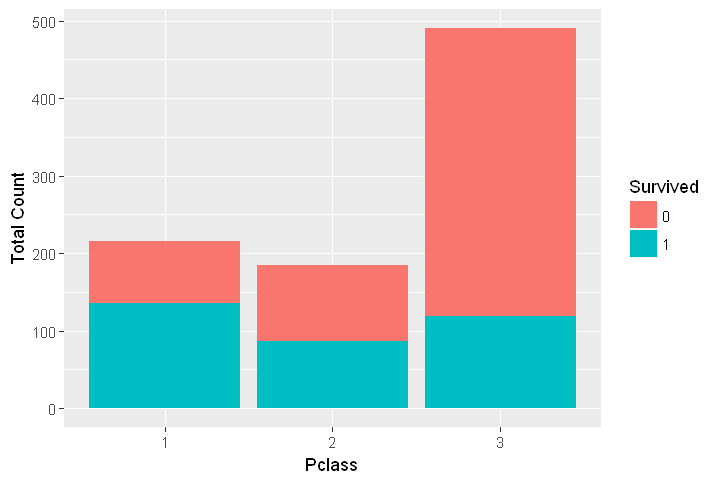

In [5]:
train$pclass <- as.factor(train$pclass)
train$survived <- as.factor(train$survived)

options(repr.plot.width=6, repr.plot.height=4)
ggplot(train, aes(x = pclass, fill = survived))   +  geom_bar() +
  xlab("Pclass")   +  ylab("Total Count") +  labs(fill = "Survived")  

### Duplicates
A few duplicate names shown, but appears that they are simply people with the same names.

In [6]:
# Unique names
sprintf("Total Unique Names: %s", length(unique(as.character(data.combined$name))))
sprintf("Total  Names: %s", length((as.character(data.combined$name))))

#show me the duplicates
dup.names <- as.character(data.combined[which(duplicated(as.character(data.combined$name))), "name"])
data.combined[which(data.combined$name %in% dup.names),]


[1] "Total Unique Names: 1307"

[1] "Total  Names: 1309"

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
290,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,,Q
697,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,,S
892,892,None,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,,Q
898,898,None,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,,Q


### People's titles
What does the person's title tell about them?'

In [7]:
## Let's take a look at Miss, Mrs, and Males
n<-5
misses <- data.combined[which(str_detect(data.combined$name, "Miss.")),]
misses[1:n,]

mrses <- data.combined[which(str_detect(data.combined$name, "Mrs.")), ]
mrses[1:n,]

males <- data.combined[which(data.combined$sex == "male"), ]
males[1:n,]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
11,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S
12,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S
15,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.8542,,S
23,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15,0,0,330923,8.0292,,Q


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S
10,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C
16,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55,0,0,248706,16.0000,,S


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,,S


## Titles and Classes
Since we think titles have something to do with whether you survived or died, let's look at titles and classes together

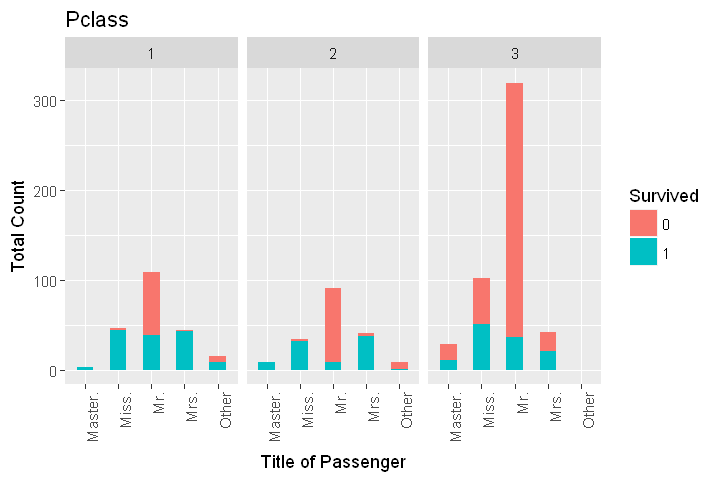

In [8]:
#functions for extracting titles
extractTitle <- function(name) {
  name <- as.character(name)
  if (length(grep("Miss.", name)) > 0) {
    return ("Miss.")
  } else if (length(grep("Master.", name)) > 0) {
    return ("Master.")
  } else if (length(grep("Mrs.", name)) > 0) {
    return ("Mrs.")
  } else if (length(grep("Mr.", name)) > 0) {
    return ("Mr.")
  } else {
    return ("Other")
  }
}


#create a title
titles <- NULL
for (i in 1:nrow(data.combined)) {
  titles <- c(titles, extractTitle(data.combined[i,"name"]))
}
data.combined$title <- as.factor(titles)

# Since we only have survived lables for the train set, only use the
# first 891 rows
options(repr.plot.width=6, repr.plot.height=4)
ggplot(data.combined[1:891,], aes(x = title, fill = survived)) + 
  stat_count(width = 0.5) +  facet_wrap(~pclass) + theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ggtitle("Pclass") + xlab("Title of Passenger") + ylab("Total Count") + labs(fill = "Survived") 

### Gender Effects On Survival Rates

In [9]:
table(data.combined$sex)


female   male 
   466    843 

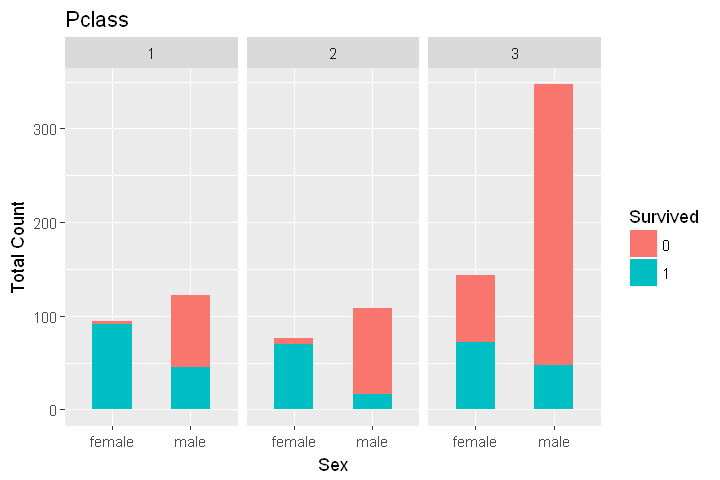

In [10]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(data.combined[1:891,], aes(x = sex, fill = survived)) +
  stat_count(width = 0.5) + facet_wrap(~pclass) + 
  ggtitle("Pclass") + xlab("Sex") + ylab("Total Count") + labs(fill = "Survived")

In [11]:
summary(data.combined$age)
summary(data.combined[1:891,"age"])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.17   21.00   28.00   29.88   39.00   80.00     263 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.42   20.12   28.00   29.70   38.00   80.00     177 

Warning message:
"Removed 177 rows containing non-finite values (stat_bin)."

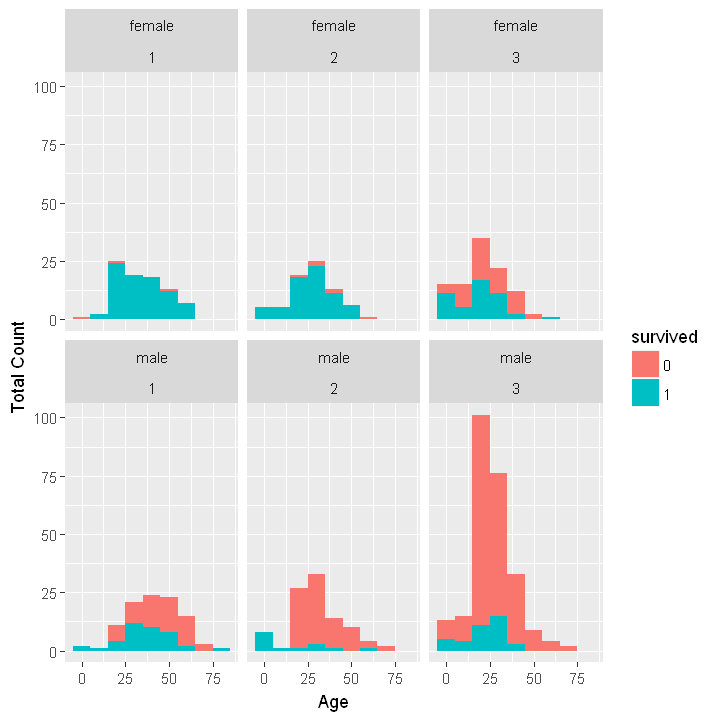

In [12]:
options(repr.plot.width=6, repr.plot.height=6)

ggplot(data.combined[1:891,], aes(x = age, fill = survived)) +
  facet_wrap(~sex + pclass) + geom_histogram(binwidth = 10) +
  xlab("Age") + ylab("Total Count")

In [13]:
boys <- data.combined[which(data.combined$title == "Master."),]
summary(boys$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.330   2.000   4.000   5.483   9.000  14.500       8 

In [14]:
misses <- data.combined[which(data.combined$title == "Miss."),]
summary(misses$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.17   15.00   22.00   21.77   30.00   63.00      50 

Warning message:
"Removed 36 rows containing non-finite values (stat_bin)."

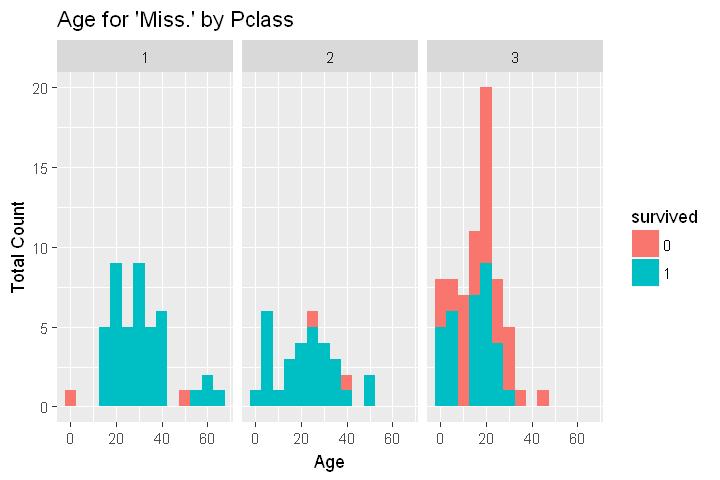

In [15]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(misses[misses$survived != "None",], aes(x = age, fill = survived)) +
  facet_wrap(~pclass) +  geom_histogram(binwidth = 5) +
  ggtitle("Age for 'Miss.' by Pclass") + xlab("Age") + ylab("Total Count")

In [16]:
# OK, appears female children may have different survival rate, 
# could be a candidate for feature engineering later
misses.alone <- misses[which(misses$sibsp == 0 & misses$parch == 0),]
summary(misses.alone$age)
length(which(misses.alone$age <= 14.5))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   5.00   21.00   26.00   27.23   32.50   58.00      33 

[1] 4

### Young Men and Women

Appears that young men traveling alone are traveling with family while young women are traveling alone. Generally the women are older while the men are younger. They are likely traveling with family.

### Sibling Factor

Does the sibling factor matter?

In [17]:
# Move on to the sibsp variable, summarize the variable
summary(data.combined$sibsp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.4989  1.0000  8.0000 

In [18]:
# Can we treat as a factor?
length(unique(data.combined$sibsp))
data.combined$parch <- as.factor(data.combined$parch)


[1] 7

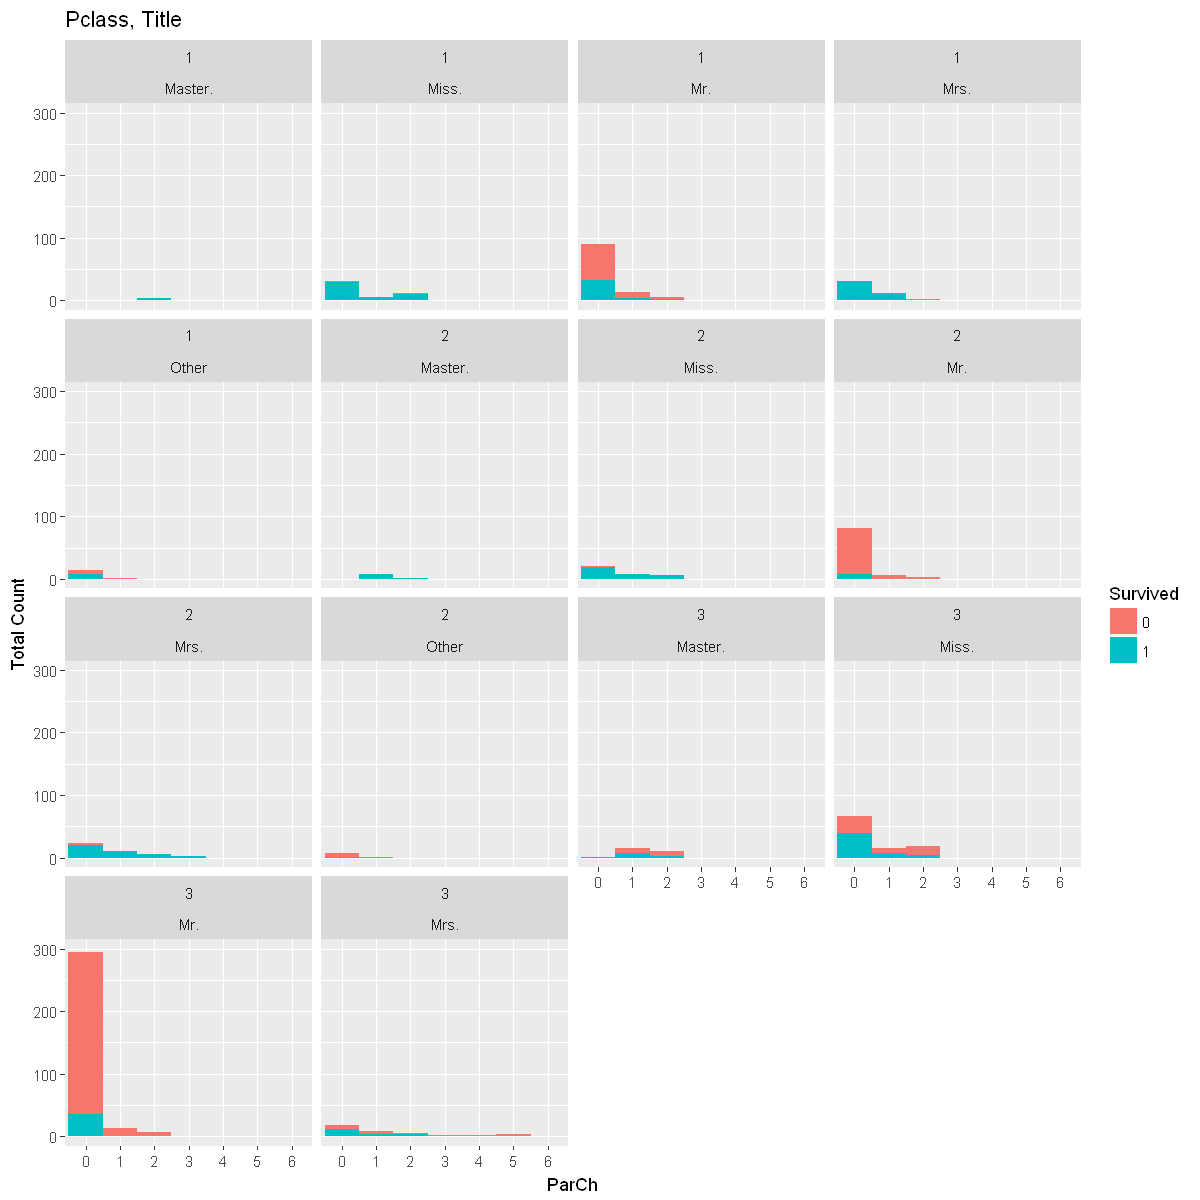

In [19]:
# Treat the parch vaiable as a factor and visualize
data.combined$parch <- as.factor(data.combined$parch)

options(repr.plot.width=10, repr.plot.height=10)

ggplot(data.combined[1:891,], aes(x = parch, fill = survived)) +
  stat_count(width = 1) +  facet_wrap(~pclass + title) + 
  ggtitle("Pclass, Title") + xlab("ParCh") + ylab("Total Count") + ylim(0,300) + labs(fill = "Survived")

### Family Size

Combining parents and siblings will give the entire family's size

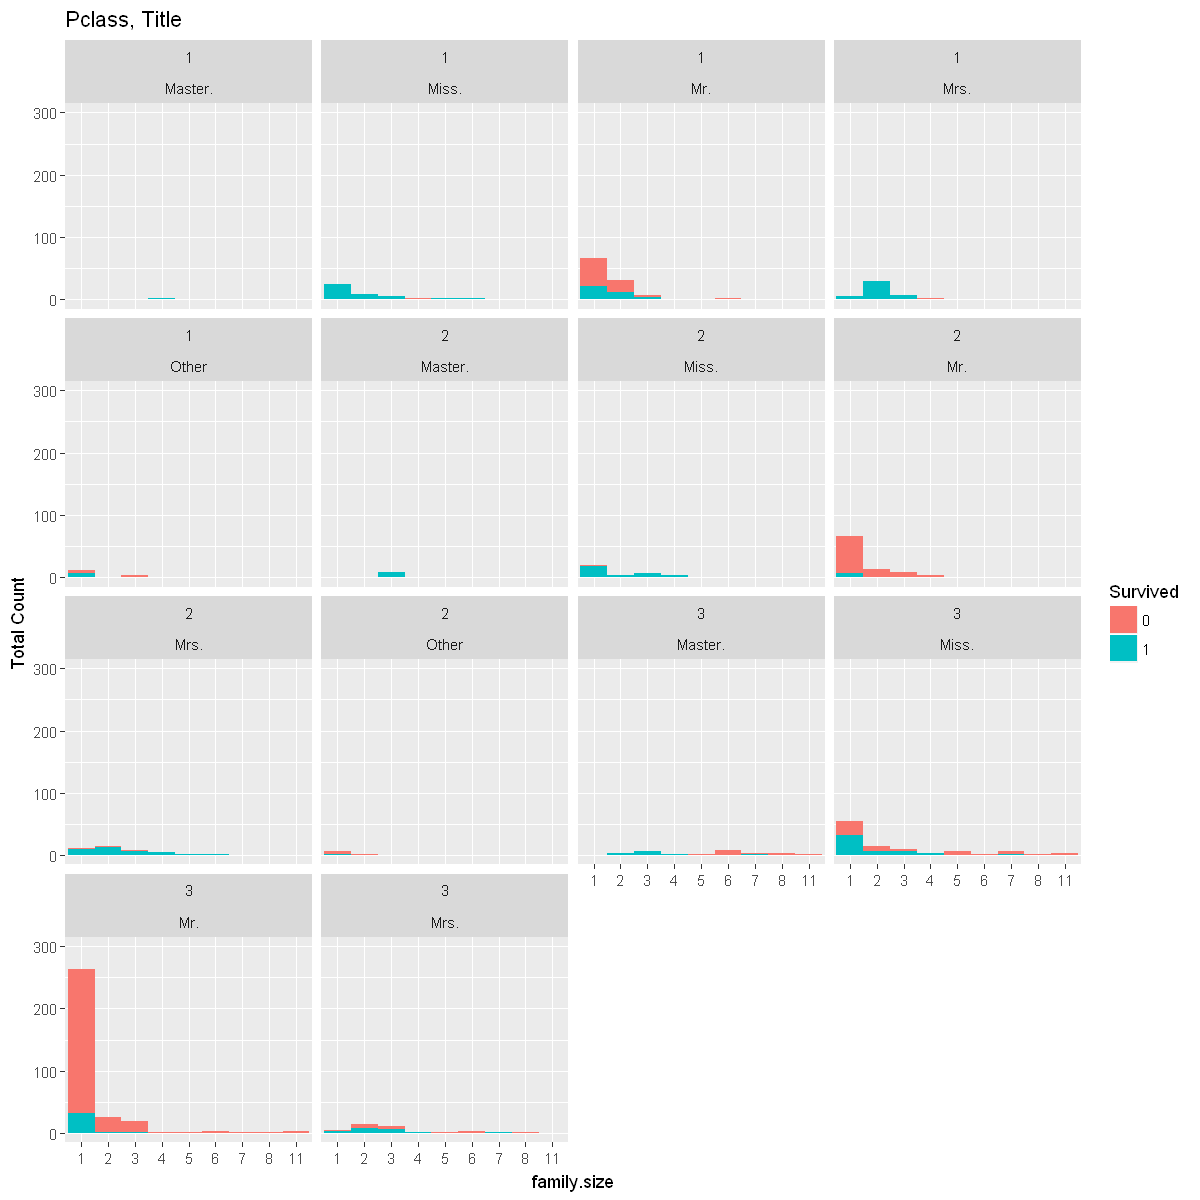

In [148]:
# Let's try some feature engineering. What about creating a family size feature?
temp.sibsp <- c(train$sibsp, test$sibsp)
temp.parch <- c(train$parch, test$parch)
data.combined$family.size <- as.factor(temp.sibsp + temp.parch + 1) #parents and siblings plus 1 to equal total family size

# Visualize it to see if it is predictive
options(repr.plot.width=10, repr.plot.height=10)

ggplot(data.combined[1:891,], aes(x = family.size, fill = survived)) +
  stat_count(width = 1) +  facet_wrap(~pclass + title) + 
  ggtitle("Pclass, Title") + xlab("family.size") +  ylab("Total Count") + ylim(0,300) +  labs(fill = "Survived")

### Ticket Variable
Does ticket variable matter?

In [21]:
# Take a look at the ticket variable
# This probably isn't a factor, probably more of a string
str(data.combined$ticket)

data.combined$ticket <- as.character(data.combined$ticket)
data.combined$ticket[1:20]


 Factor w/ 929 levels "110152","110413",..: 524 597 670 50 473 276 86 396 345 133 ...


[1] "A/5 21171"        "PC 17599"         "STON/O2. 3101282" "113803"          
 [5] "373450"           "330877"           "17463"            "349909"          
 [9] "347742"           "237736"           "PP 9549"          "113783"          
[13] "A/5. 2151"        "347082"           "350406"           "248706"          
[17] "382652"           "244373"           "345763"           "2649"

[1] "A" "P" "S" "1" "3" "2" "C" "7" "W" "4" "F" "L" "9" "6" "5" "8"

Warning message:
"Removed 1 rows containing missing values (geom_bar)."

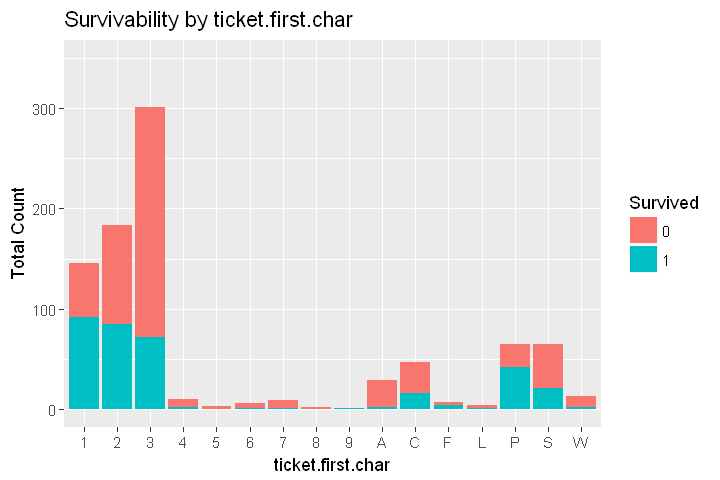

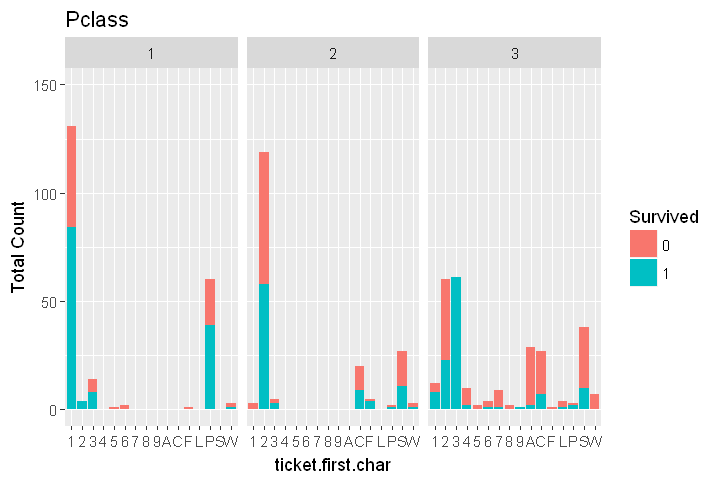

In [22]:
ticket.first.char <- ifelse(data.combined$ticket == "", " ", substr(data.combined$ticket, 1, 1))
unique(ticket.first.char)
# OK, we can make a factor for analysis purposes and visualize
data.combined$ticket.first.char <- as.factor(ticket.first.char)

# First, a high-level plot of the data
options(repr.plot.width=6, repr.plot.height=4)
ggplot(data.combined[1:891,], aes(x = ticket.first.char, fill = survived)) +  geom_bar() +
  ggtitle("Survivability by ticket.first.char") + xlab("ticket.first.char") + ylab("Total Count") + ylim(0,350) + labs(fill = "Survived")

# Ticket seems like it might be predictive, drill down a bit
ggplot(data.combined[1:891,], aes(x = ticket.first.char, fill = survived)) + geom_bar() + facet_wrap(~pclass) + 
  ggtitle("Pclass") + xlab("ticket.first.char") +  ylab("Total Count") +  ylim(0,150) +  labs(fill = "Survived")


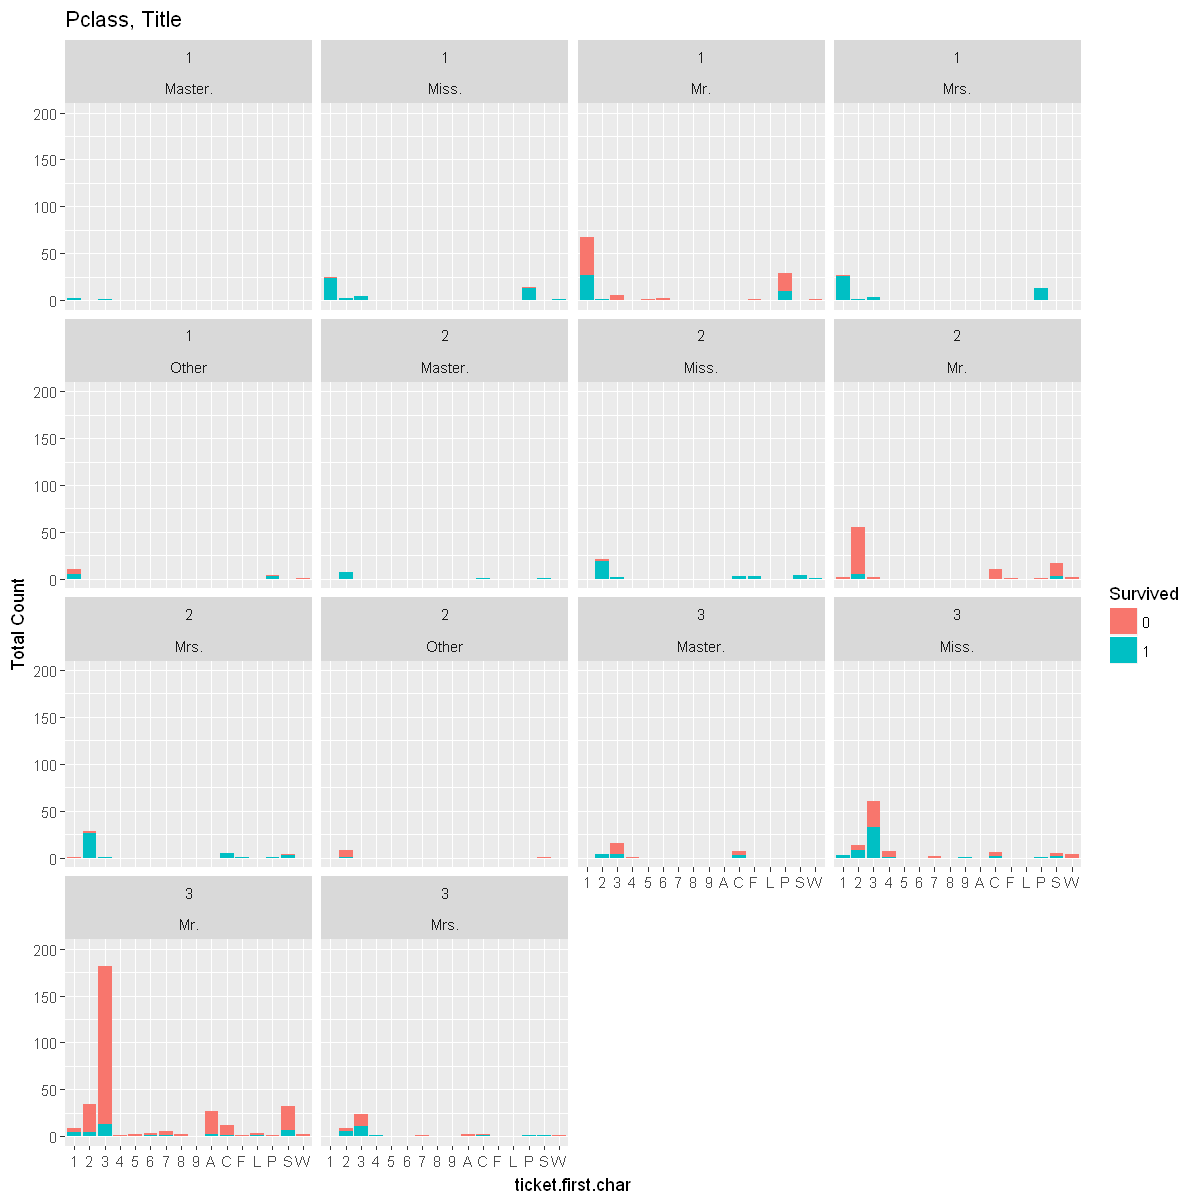

In [23]:
# Lastly, see if we get a pattern when using combination of pclass & title
options(repr.plot.width=10, repr.plot.height=10)

ggplot(data.combined[1:891,], aes(x = ticket.first.char, fill = survived)) + geom_bar() + facet_wrap(~pclass + title) + 
  ggtitle("Pclass, Title") +  xlab("ticket.first.char") +  ylab("Total Count") +  ylim(0,200) +  labs(fill = "Survived")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   7.896  14.450  33.300  31.280 512.300       1 

[1] 282

Warning message:
"Removed 1 rows containing non-finite values (stat_count)."Warning message:
"position_stack requires non-overlapping x intervals"

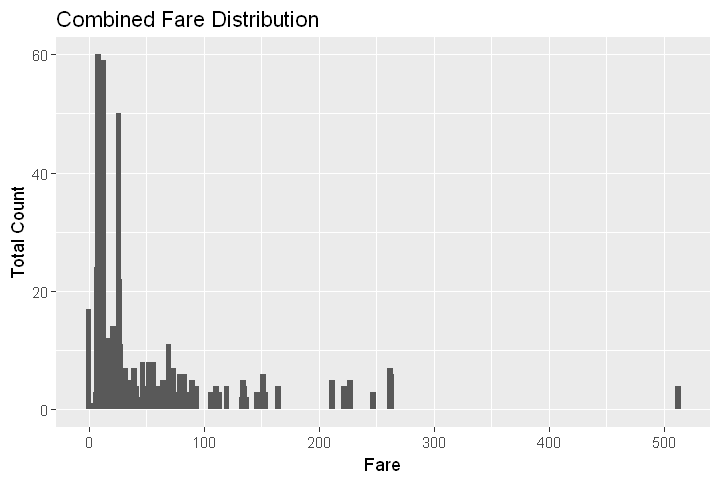

In [24]:
# Next up - the fares Titanic passengers paid
summary(data.combined$fare)
length(unique(data.combined$fare))

# Can't make fare a factor, treat as numeric & visualize with histogram
options(repr.plot.width=6, repr.plot.height=4)

ggplot(data.combined, aes(x = fare)) + stat_count(width = 5) +
  ggtitle("Combined Fare Distribution") + xlab("Fare") + ylab("Total Count") + ylim(0,60)

Warning message:
"position_stack requires non-overlapping x intervals"Warning message:
"position_stack requires non-overlapping x intervals"Warning message:
"position_stack requires non-overlapping x intervals"Warning message:
"position_stack requires non-overlapping x intervals"Warning message:
"position_stack requires non-overlapping x intervals"Warning message:
"position_stack requires non-overlapping x intervals"Warning message:
"position_stack requires non-overlapping x intervals"Warning message:
"position_stack requires non-overlapping x intervals"Warning message:
"position_stack requires non-overlapping x intervals"Warning message:
"position_stack requires non-overlapping x intervals"Warning message:
"position_stack requires non-overlapping x intervals"Warning message:
"position_stack requires non-overlapping x intervals"Warning message:
"position_stack requires non-overlapping x intervals"

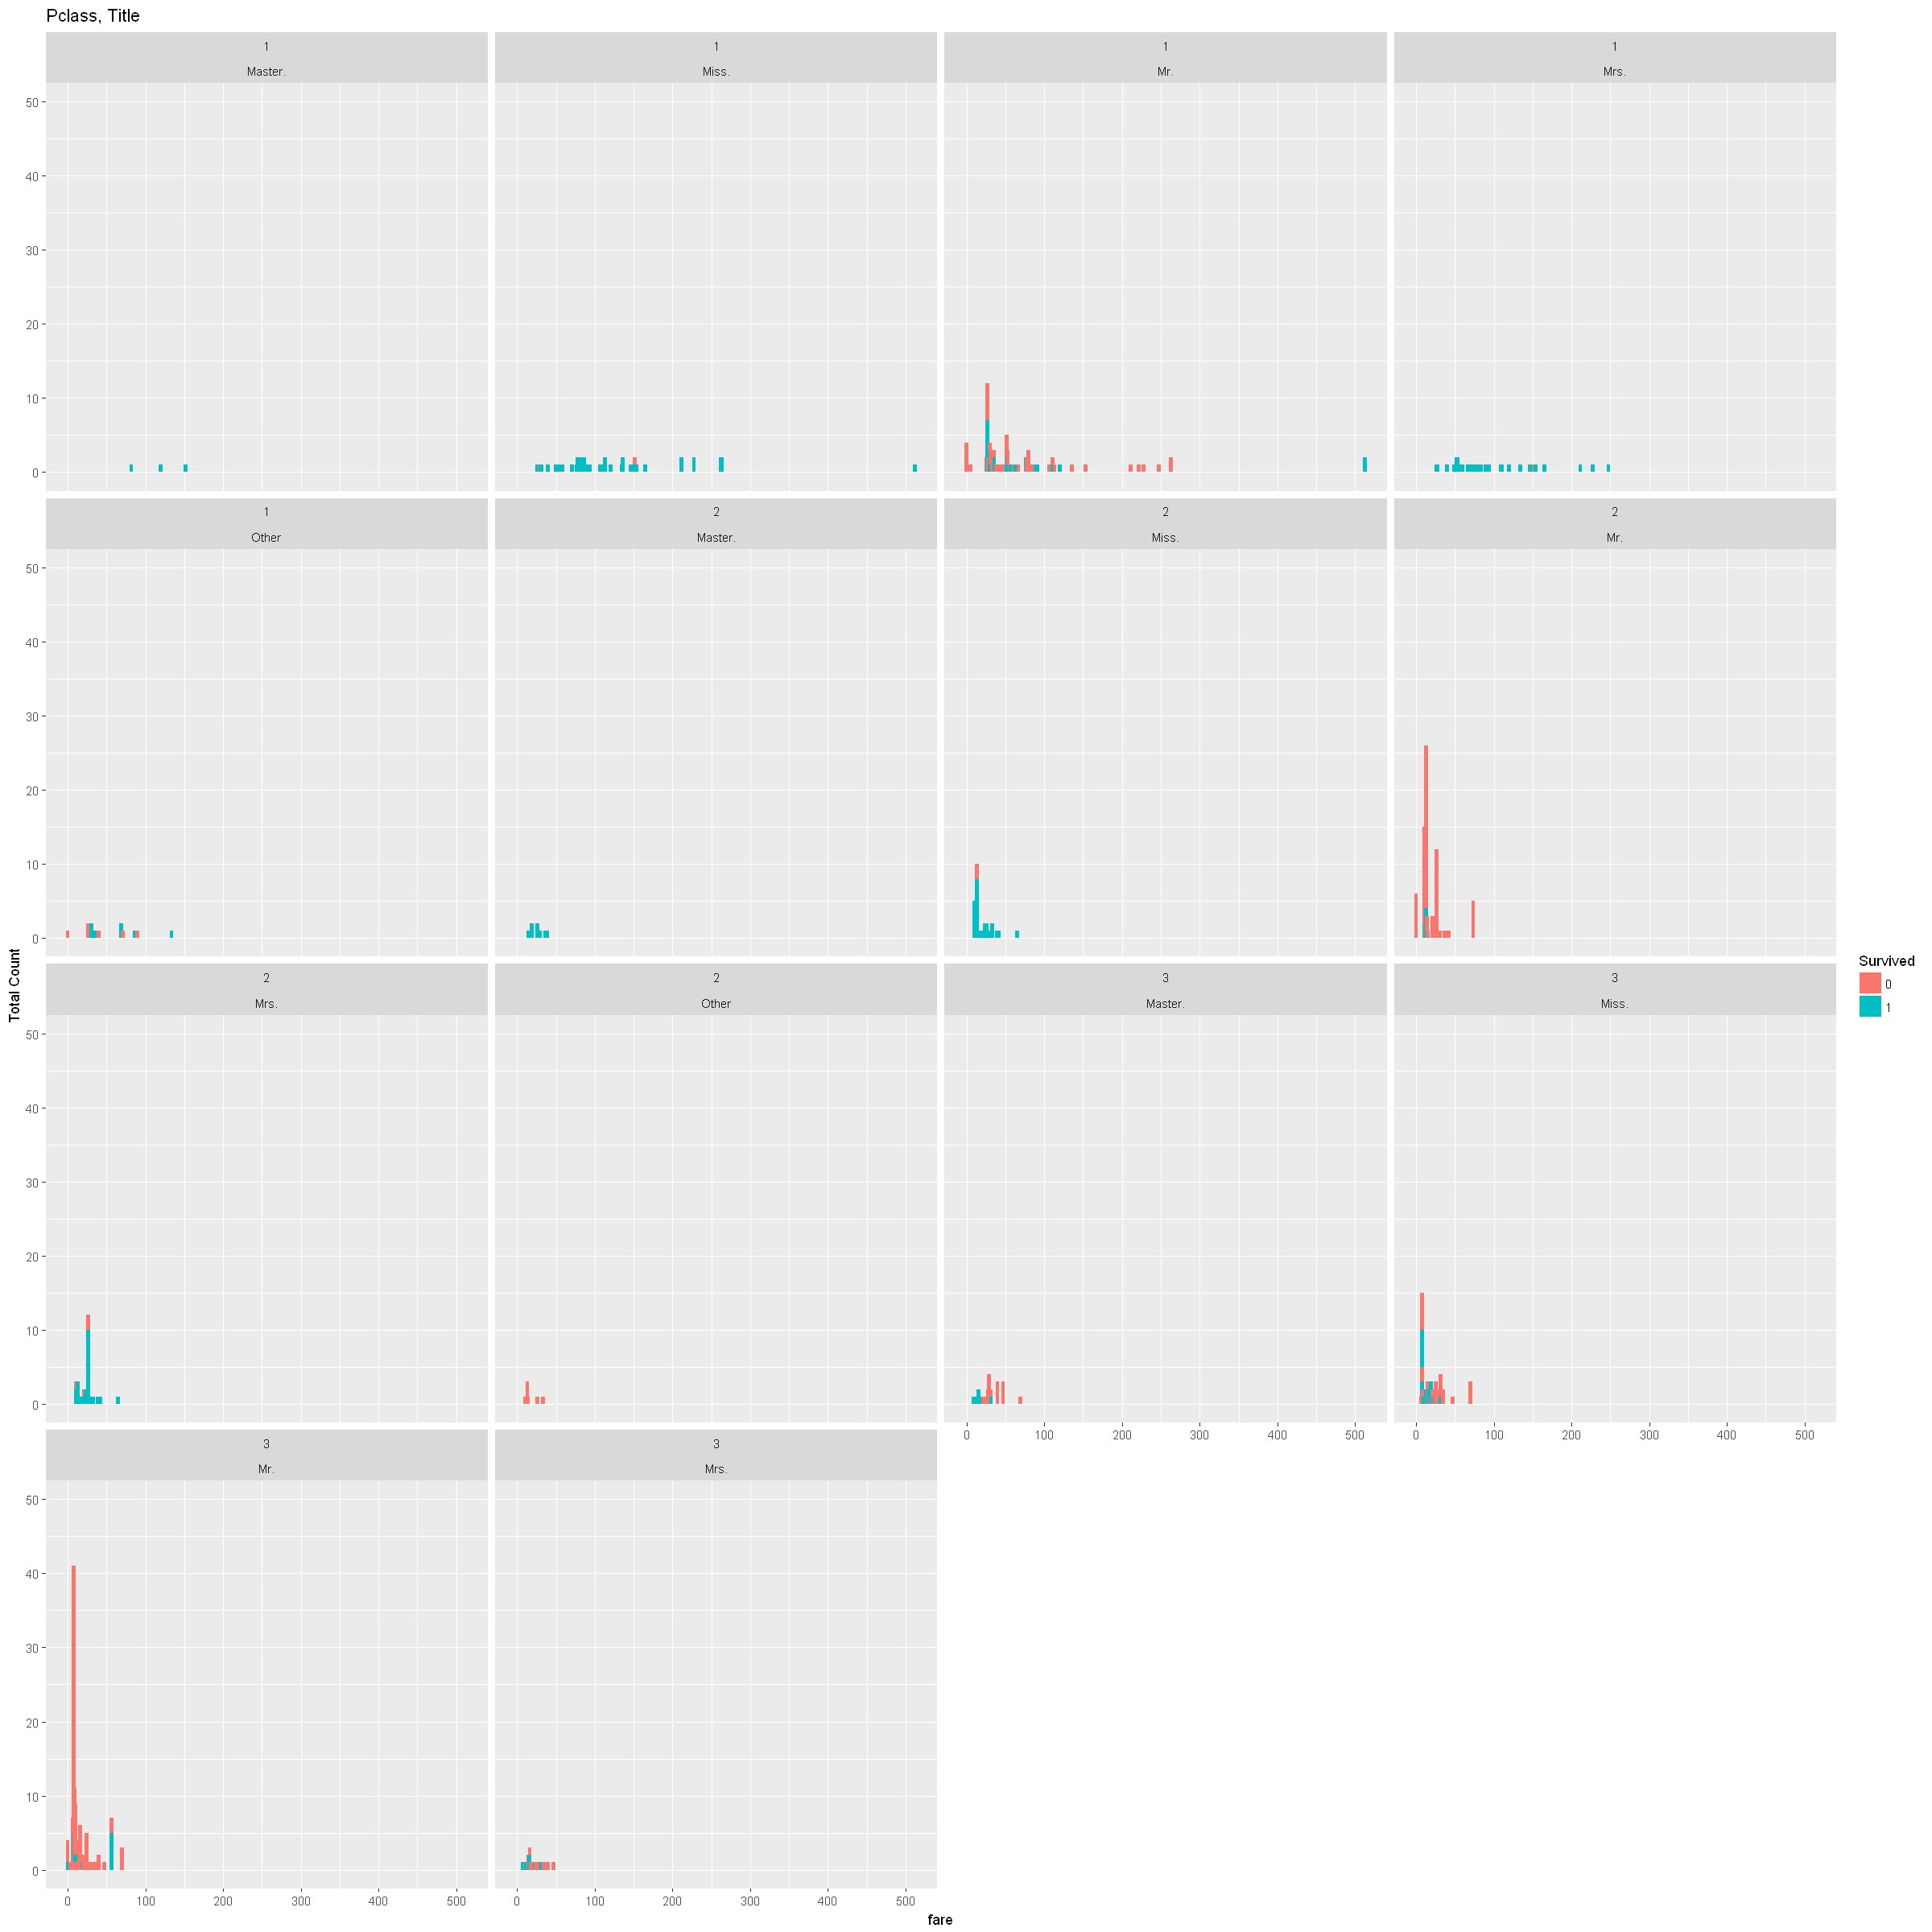

In [26]:
# Let's check to see if fare has predictive power
options(repr.plot.width=20, repr.plot.height=20)

ggplot(data.combined[1:891,], aes(x = fare, fill = survived)) +
  stat_count(width = 5) + facet_wrap(~pclass + title) +  
  ggtitle("Pclass, Title") + xlab("fare") + ylab("Total Count") +  ylim(0,50) +   labs(fill = "Survived")

### Cabin Position
Does cabin show us anything? We need to take a look, perhaps feature extract some stuff, and see how it works out.

In [27]:
# Analysis of the cabin variable
str(data.combined$cabin)

# Cabin really isn't a factor, make a string and the display first 100
data.combined$cabin <- as.character(data.combined$cabin)
data.combined$cabin[1:100]

# Replace empty cabins with a "U"
data.combined[which(data.combined$cabin == ""), "cabin"] <- "U"
data.combined$cabin[1:100]

# Take a look at just the first char as a factor
cabin.first.char <- as.factor(substr(data.combined$cabin, 1, 1))
str(cabin.first.char)
levels(cabin.first.char)

 Factor w/ 187 levels "","A10","A14",..: 1 83 1 57 1 1 131 1 1 1 ...


[1] ""            "C85"         ""            "C123"        ""           
  [6] ""            "E46"         ""            ""            ""           
 [11] "G6"          "C103"        ""            ""            ""           
 [16] ""            ""            ""            ""            ""           
 [21] ""            "D56"         ""            "A6"          ""           
 [26] ""            ""            "C23 C25 C27" ""            ""           
 [31] ""            "B78"         ""            ""            ""           
 [36] ""            ""            ""            ""            ""           
 [41] ""            ""            ""            ""            ""           
 [46] ""            ""            ""            ""            ""           
 [51] ""            ""            "D33"         ""            "B30"        
 [56] "C52"         ""            ""            ""            ""           
 [61] ""            "B28"         "C83"         ""            ""           
 [66] ""            "F33"         ""            ""            ""           
 [71] ""            ""            ""            ""            ""           
 [76] "F G73"       ""            ""            ""            ""           
 [81] ""            ""            ""            ""            ""           
 [86] ""            ""            ""            "C23 C25 C27" ""           
 [91] ""            ""            "E31"         ""            ""           
 [96] ""            "A5"          "D10 D12"     ""            ""

[1] "U"           "C85"         "U"           "C123"        "U"          
  [6] "U"           "E46"         "U"           "U"           "U"          
 [11] "G6"          "C103"        "U"           "U"           "U"          
 [16] "U"           "U"           "U"           "U"           "U"          
 [21] "U"           "D56"         "U"           "A6"          "U"          
 [26] "U"           "U"           "C23 C25 C27" "U"           "U"          
 [31] "U"           "B78"         "U"           "U"           "U"          
 [36] "U"           "U"           "U"           "U"           "U"          
 [41] "U"           "U"           "U"           "U"           "U"          
 [46] "U"           "U"           "U"           "U"           "U"          
 [51] "U"           "U"           "D33"         "U"           "B30"        
 [56] "C52"         "U"           "U"           "U"           "U"          
 [61] "U"           "B28"         "C83"         "U"           "U"          
 [66] "U"           "F33"         "U"           "U"           "U"          
 [71] "U"           "U"           "U"           "U"           "U"          
 [76] "F G73"       "U"           "U"           "U"           "U"          
 [81] "U"           "U"           "U"           "U"           "U"          
 [86] "U"           "U"           "U"           "C23 C25 C27" "U"          
 [91] "U"           "U"           "E31"         "U"           "U"          
 [96] "U"           "A5"          "D10 D12"     "U"           "U"

 Factor w/ 9 levels "A","B","C","D",..: 9 3 9 3 9 9 5 9 9 9 ...


[1] "A" "B" "C" "D" "E" "F" "G" "T" "U"

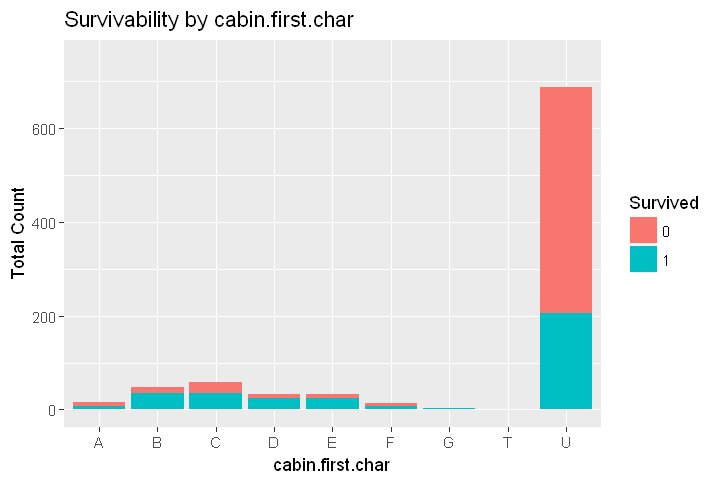

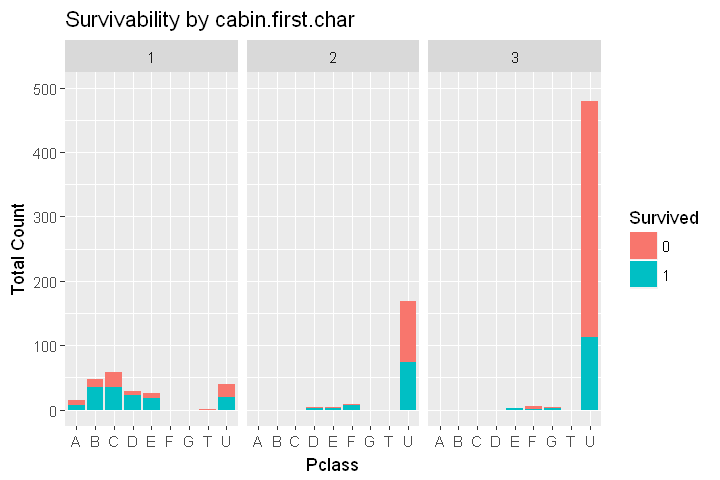

In [28]:
# Let's check to see if fare has predictive power
options(repr.plot.width=6, repr.plot.height=4)

# Add to combined data set and plot 
data.combined$cabin.first.char <- cabin.first.char

# High level plot
ggplot(data.combined[1:891,], aes(x = cabin.first.char, fill = survived)) + geom_bar() +
  ggtitle("Survivability by cabin.first.char") + xlab("cabin.first.char") + ylab("Total Count") + ylim(0,750) + labs(fill = "Survived")

# Could have some predictive power, drill in
ggplot(data.combined[1:891,], aes(x = cabin.first.char, fill = survived)) +
  geom_bar() + facet_wrap(~pclass) + ggtitle("Survivability by cabin.first.char") + xlab("Pclass") + ylab("Total Count") +ylim(0,500) + labs(fill = "Survived")


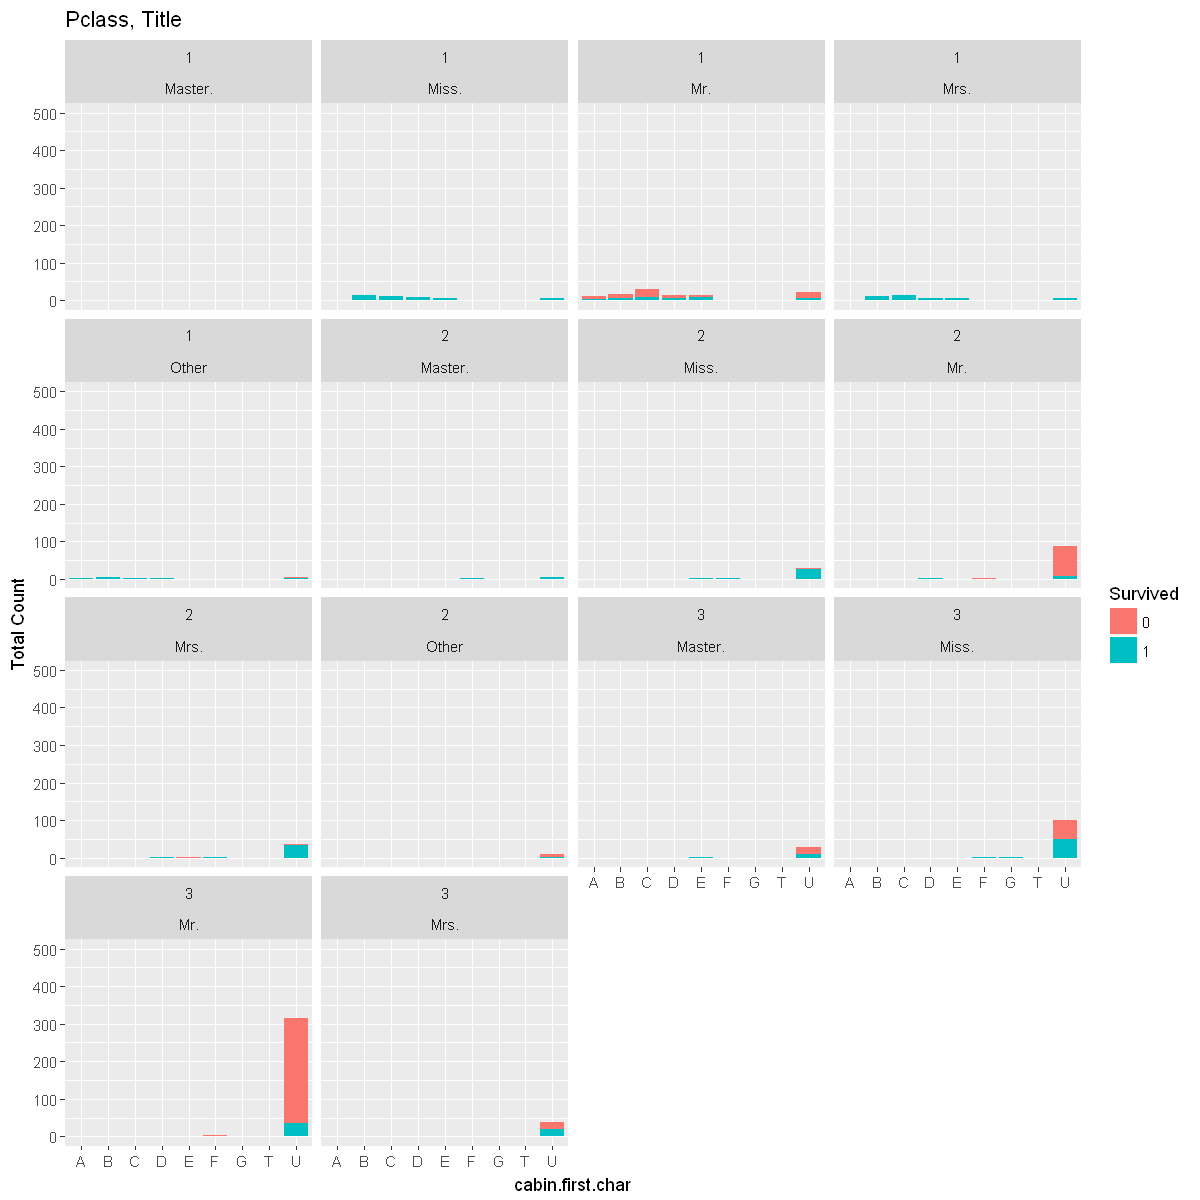

In [29]:
# Does this feature improve upon pclass + title?
options(repr.plot.width=10, repr.plot.height=10)

ggplot(data.combined[1:891,], aes(x = cabin.first.char, fill = survived)) +
  geom_bar() +
  facet_wrap(~pclass + title) +
  ggtitle("Pclass, Title") +
  xlab("cabin.first.char") +
  ylab("Total Count") +
  ylim(0,500) +
  labs(fill = "Survived")


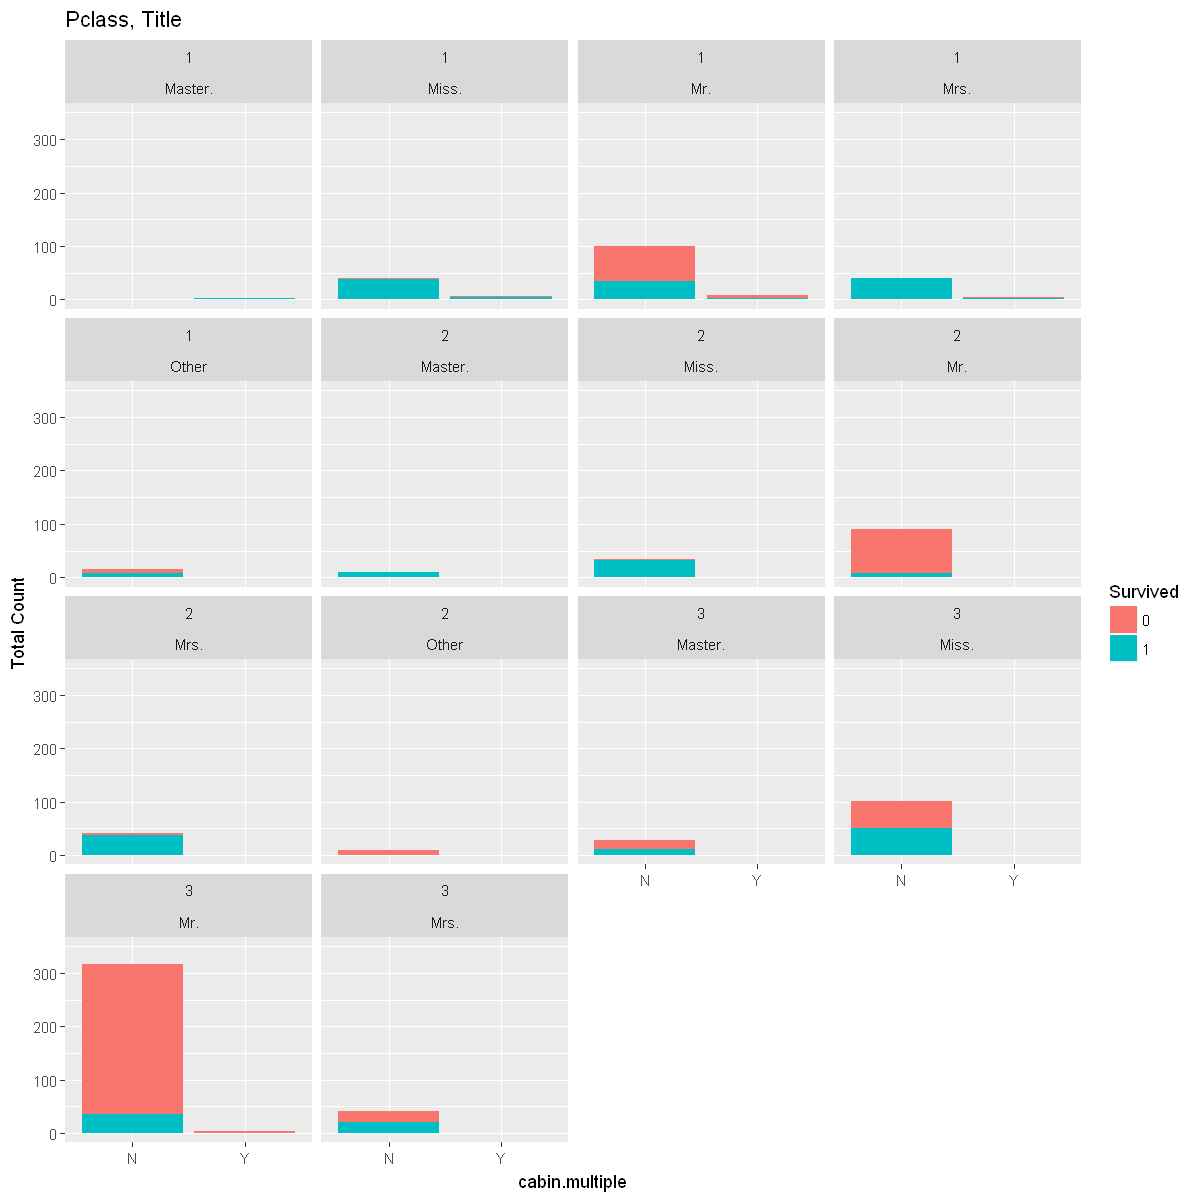

In [30]:
# What about folks with multiple cabins?
options(repr.plot.width=10, repr.plot.height=10)

data.combined$cabin.multiple <- as.factor(ifelse(str_detect(data.combined$cabin, " "), "Y", "N"))

ggplot(data.combined[1:891,], aes(x = cabin.multiple, fill = survived)) + geom_bar() + facet_wrap(~pclass + title) +
  ggtitle("Pclass, Title") + xlab("cabin.multiple") +  ylab("Total Count") +   ylim(0,350) +  labs(fill = "Survived")

 Factor w/ 4 levels "","C","Q","S": 4 2 4 4 4 3 4 4 4 2 ...


[1] ""  "C" "Q" "S"

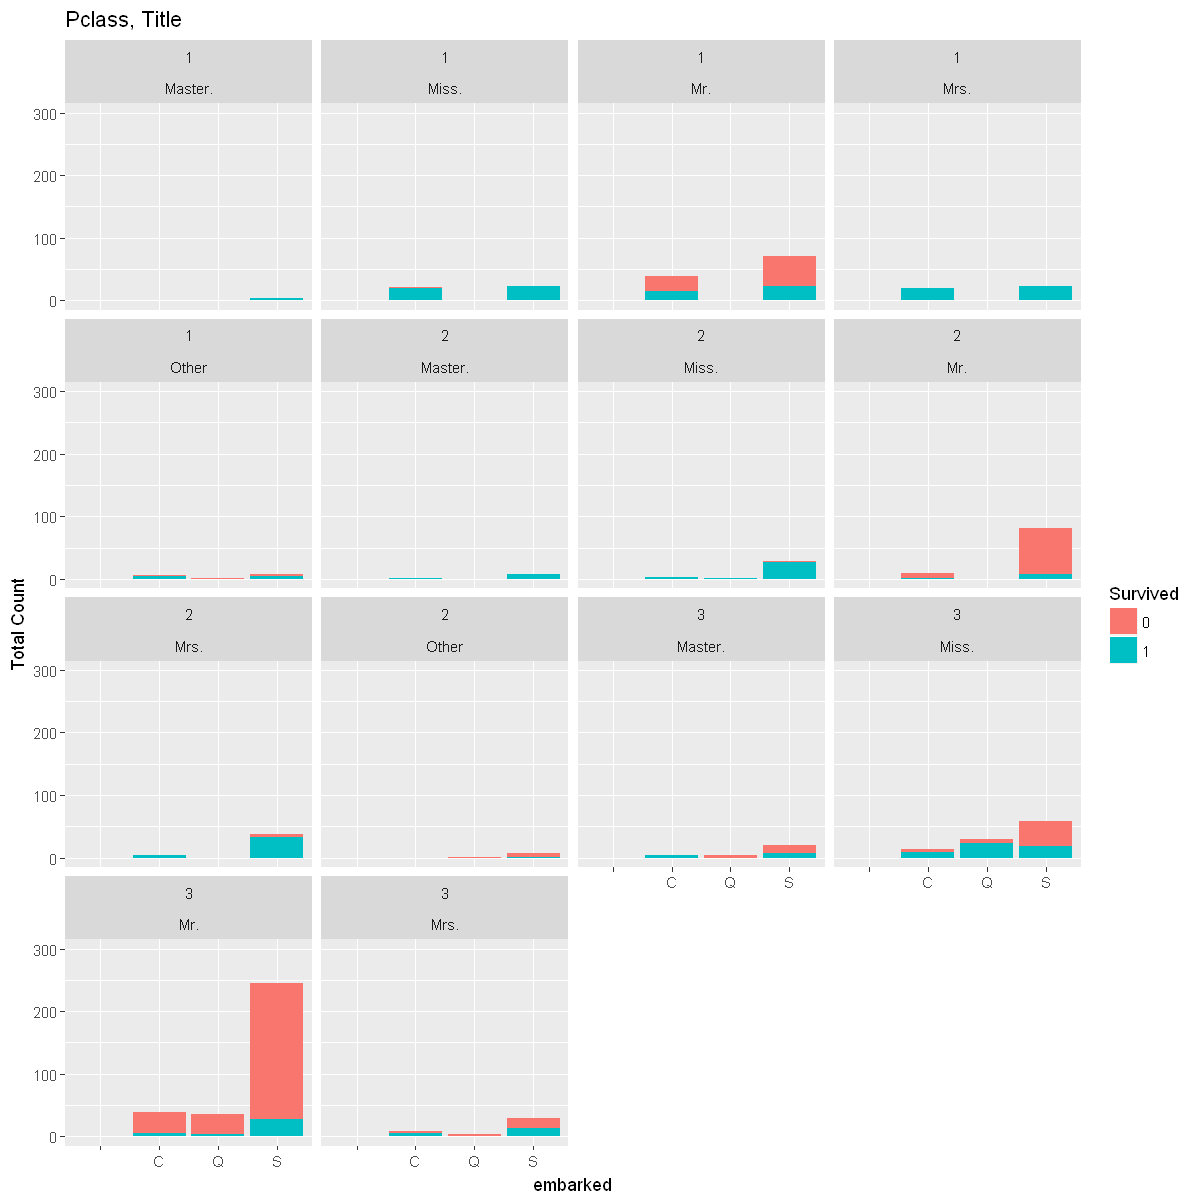

In [31]:
# Does survivability depend on where you got onboard the Titanic?
str(data.combined$embarked)
levels(data.combined$embarked)


# Plot data for analysis
ggplot(data.combined[1:891,], aes(x = embarked, fill = survived)) +  geom_bar() +  facet_wrap(~pclass + title) +
  ggtitle("Pclass, Title") + xlab("embarked") + ylab("Total Count") + ylim(0,300) +  labs(fill = "Survived")


## MACHINE LEARNING 
Now that we've done so much data analysis, we will learn machine learning

Random forrest is great because: <br/>
Feature selection - does feature selection very well. <br/>
Simple - hyperparameters work very well <br/>
RF can handle numeric, categorical, and correlated variables <br/>
Fast - good balance between speed and capabilities<br/>
Effective - powerful and general purpose. This is the gold standard 


In [32]:
#install.packages('randomForest', repos='http://cran.us.r-project.org')

In [33]:
#install.packages('randomForest', repos='http://cran.us.r-project.org')
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 3.3.3"randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin




Call:
 randomForest(x = rf.train.1, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 1

        OOB estimate of  error rate: 20.76%
Confusion matrix:
    0   1 class.error
0 538  11  0.02003643
1 174 168  0.50877193

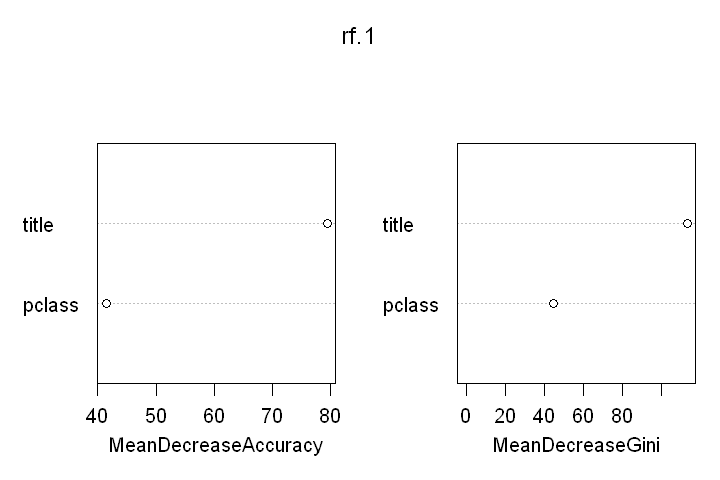

In [34]:
options(repr.plot.width=6, repr.plot.height=4)

# Train a Random Forest with the default parameters using pclass & title
rf.train.1 <- data.combined[1:891, c("pclass", "title")]
rf.label <- as.factor(train$survived)

set.seed(1234)
rf.1 <- randomForest(x = rf.train.1, y = rf.label, importance = TRUE, ntree = 1000)
rf.1
varImpPlot(rf.1)


Call:
 randomForest(x = rf.train.2, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 1

        OOB estimate of  error rate: 19.3%
Confusion matrix:
    0   1 class.error
0 495  54  0.09836066
1 118 224  0.34502924

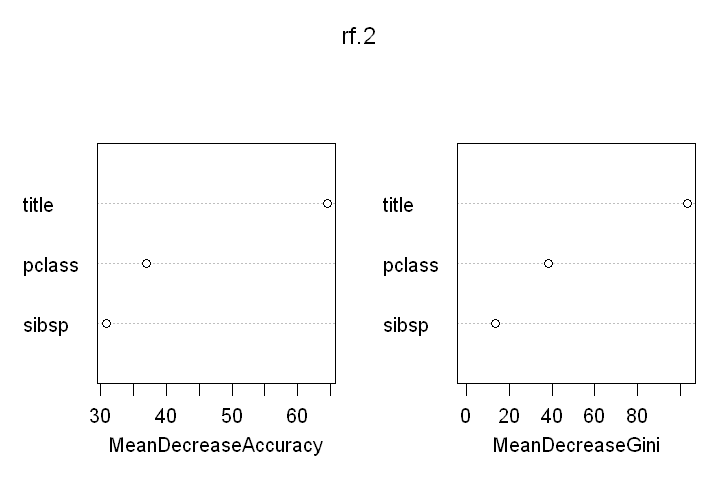

In [35]:
# Train a Random Forest using pclass, title, & sibsp
rf.train.2 <- data.combined[1:891, c("pclass", "title", "sibsp")]

set.seed(1234)
rf.2 <- randomForest(x = rf.train.2, y = rf.label, importance = TRUE, ntree = 1000)
rf.2
varImpPlot(rf.2)


Call:
 randomForest(x = rf.train.3, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 1

        OOB estimate of  error rate: 19.98%
Confusion matrix:
    0   1 class.error
0 495  54  0.09836066
1 124 218  0.36257310

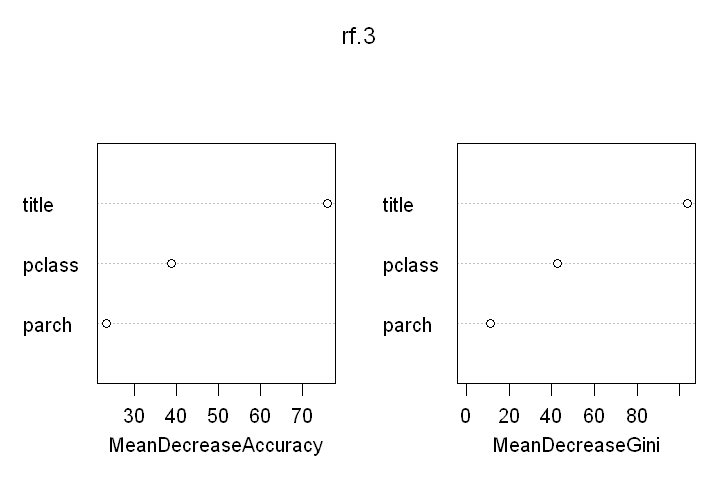

In [36]:
# Train a Random Forest using pclass, title, & parch
rf.train.3 <- data.combined[1:891, c("pclass", "title", "parch")]

set.seed(1234)
rf.3 <- randomForest(x = rf.train.3, y = rf.label, importance = TRUE, ntree = 1000)
rf.3
varImpPlot(rf.3)


Call:
 randomForest(x = rf.train.4, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 18.86%
Confusion matrix:
    0   1 class.error
0 487  62   0.1129326
1 106 236   0.3099415

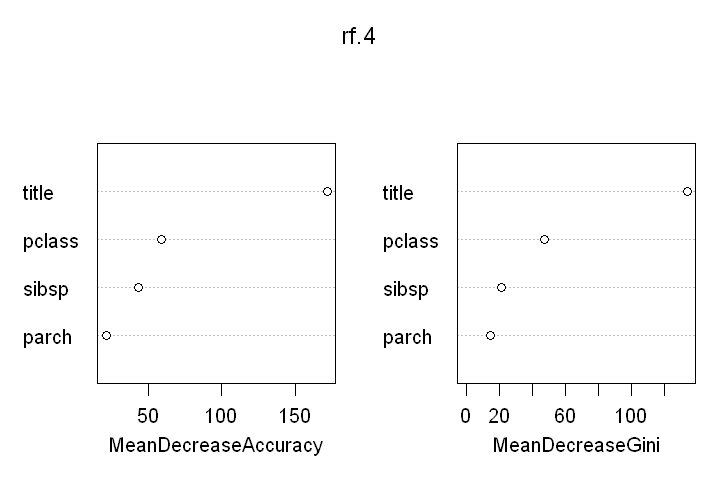

In [37]:
# Train a Random Forest using pclass, title, sibsp, parch
rf.train.4 <- data.combined[1:891, c("pclass", "title", "sibsp", "parch")]

set.seed(1234)
rf.4 <- randomForest(x = rf.train.4, y = rf.label, importance = TRUE, ntree = 1000)
rf.4
varImpPlot(rf.4)



Call:
 randomForest(x = rf.train.5, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 1

        OOB estimate of  error rate: 18.41%
Confusion matrix:
    0   1 class.error
0 485  64   0.1165756
1 100 242   0.2923977

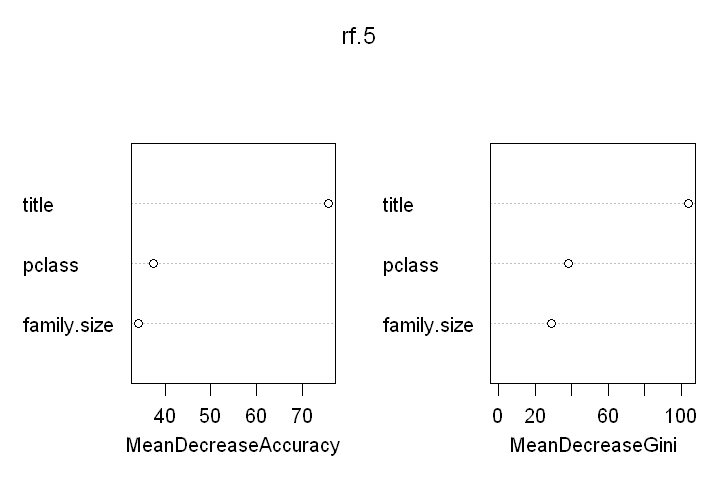

In [38]:
# Train a Random Forest using pclass, title, & family.size
rf.train.5 <- data.combined[1:891, c("pclass", "title", "family.size")]

set.seed(1234)
rf.5 <- randomForest(x = rf.train.5, y = rf.label, importance = TRUE, ntree = 1000)
rf.5
varImpPlot(rf.5)


Call:
 randomForest(x = rf.train.6, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 19.08%
Confusion matrix:
    0   1 class.error
0 486  63   0.1147541
1 107 235   0.3128655

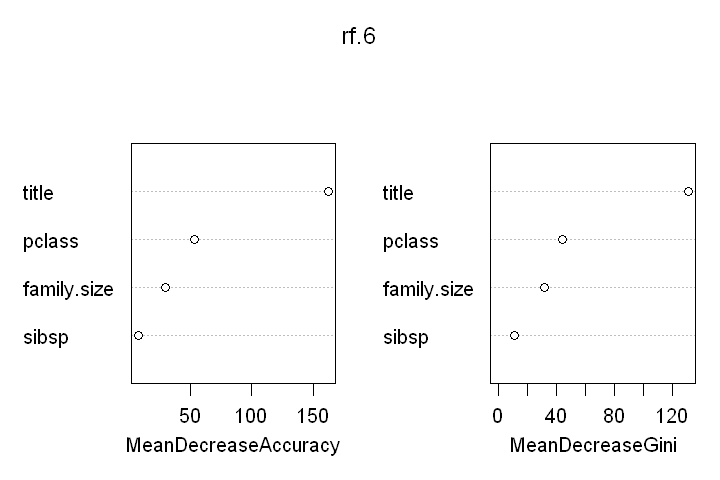

In [39]:
# Train a Random Forest using pclass, title, sibsp, & family.size
rf.train.6 <- data.combined[1:891, c("pclass", "title", "sibsp", "family.size")]

set.seed(1234)
rf.6 <- randomForest(x = rf.train.6, y = rf.label, importance = TRUE, ntree = 1000)
rf.6
varImpPlot(rf.6)


Call:
 randomForest(x = rf.train.7, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 18.97%
Confusion matrix:
    0   1 class.error
0 486  63   0.1147541
1 106 236   0.3099415

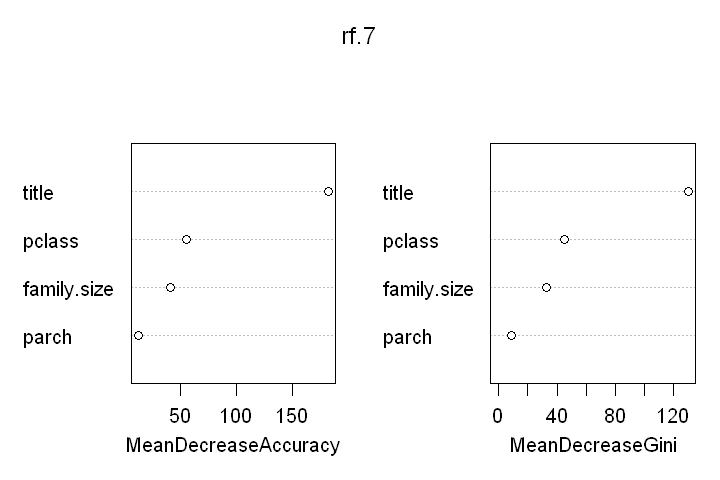

In [40]:
# Train a Random Forest using pclass, title, parch, & family.size
rf.train.7 <- data.combined[1:891, c("pclass", "title", "parch", "family.size")]

set.seed(1234)
rf.7 <- randomForest(x = rf.train.7, y = rf.label, importance = TRUE, ntree = 1000)
rf.7
varImpPlot(rf.7)

### CV Search
Time to tune settings!

In [41]:
# Subset our test records and features
test.submit.df <- data.combined[892:1309, c("pclass", "title", "family.size")]

In [42]:
# Make predictions
rf.5.preds <- predict(rf.5, test.submit.df)
table(rf.5.preds)

# Write out a CSV file for submission to Kaggle
submit.df <- data.frame(PassengerId = rep(892:1309), Survived = rf.5.preds)

write.csv(submit.df, file = "RF_SUB_20160215_1.csv", row.names = FALSE)

rf.5.preds
  0   1 
258 160 

In [43]:
library(caret)  #cv 
library(doSNOW) #using multithreading

Warning message:
"package 'caret' was built under R version 3.3.3"Loading required package: lattice
Warning message:
"package 'doSNOW' was built under R version 3.3.3"Loading required package: foreach
Loading required package: iterators
Loading required package: snow
Warning message:
"package 'snow' was built under R version 3.3.2"

Research has shown that 10-fold CV repeated 10 times is the best place to start,
however there are no hard and fast rules - this is where the experience of the 
Data Scientist (i.e., the "art") comes into play. We'll start with 10-fold CV,
repeated 10 times and see how it goes.

Leverage caret to create 100 total folds, but ensure that the ratio of those
that survived and perished in each fold matches the overall training set. This
is known as stratified cross validation and generally provides better results.


In [44]:
## 10 fold cross validation 10 times
## CreateMultiFolds preserves the ratio in the current data set
set.seed(2348)
cv.10.folds <- createMultiFolds(rf.label, k = 10, times = 10) #10 times won't re
ctrl.1 <- trainControl(method = "repeatedcv", number = 10, repeats = 10,index = cv.10.folds)

#take a look at what they look like
table(rf.label)
table(rf.label[cv.10.folds[[33]]])
str(cv.10.folds)

rf.label
  0   1 
549 342 


  0   1 
494 308 

List of 100
 $ Fold01.Rep01: int [1:801] 1 2 3 5 6 7 8 9 10 11 ...
 $ Fold02.Rep01: int [1:802] 1 2 4 5 6 7 8 9 10 11 ...
 $ Fold03.Rep01: int [1:802] 1 2 3 4 5 6 7 8 9 10 ...
 $ Fold04.Rep01: int [1:803] 2 3 4 5 6 7 9 10 11 12 ...
 $ Fold05.Rep01: int [1:802] 1 2 3 4 5 6 7 8 9 10 ...
 $ Fold06.Rep01: int [1:801] 1 2 3 4 5 6 7 8 9 12 ...
 $ Fold07.Rep01: int [1:802] 1 2 3 4 5 6 7 8 9 10 ...
 $ Fold08.Rep01: int [1:802] 1 3 4 6 7 8 10 11 13 14 ...
 $ Fold09.Rep01: int [1:802] 1 2 3 4 5 6 8 9 10 11 ...
 $ Fold10.Rep01: int [1:802] 1 2 3 4 5 7 8 9 10 11 ...
 $ Fold01.Rep02: int [1:802] 1 2 3 4 5 6 7 8 9 10 ...
 $ Fold02.Rep02: int [1:802] 1 2 3 5 6 8 10 12 13 14 ...
 $ Fold03.Rep02: int [1:802] 1 2 4 5 7 8 9 11 12 13 ...
 $ Fold04.Rep02: int [1:801] 1 2 3 4 5 6 7 8 9 10 ...
 $ Fold05.Rep02: int [1:802] 1 2 3 4 5 6 7 8 9 10 ...
 $ Fold06.Rep02: int [1:802] 1 2 3 4 5 6 7 9 10 11 ...
 $ Fold07.Rep02: int [1:802] 1 2 3 4 5 6 7 8 9 10 ...
 $ Fold08.Rep02: int [1:802] 1 2 3 4 5 6 7 8 9 10 ...
 

In [45]:
# Get number of processors, minus 1
n=as.integer(Sys.getenv('NUMBER_OF_PROCESSORS'))-1
c('Numb of Cores used',n)

[1] "Numb of Cores used" "3"

In [46]:
# Set up doSNOW package for multi-core training. This is helpful as we're going to be training a lot of trees.
# NOTE - This works on Windows and Mac, unlike doMC
cl <- makeCluster(n, type = "SOCK")
registerDoSNOW(cl)

In [47]:
set.seed(34324)
rf.5.cv.1 <- train(x = rf.train.5, y = rf.label, method = "rf", tuneLength = 3, ntree = 1000, trControl = ctrl.1)
#Shutdown cluster
stopCluster(cl)

rf.5
rf.5.cv.1 

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .




Call:
 randomForest(x = rf.train.5, y = rf.label, ntree = 1000, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 1

        OOB estimate of  error rate: 18.41%
Confusion matrix:
    0   1 class.error
0 485  64   0.1165756
1 100 242   0.2923977

Random Forest 

891 samples
  3 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 801, 802, 802, 803, 802, 801, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8121316  0.5929087
  3     0.8089966  0.5852138

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 2.

In [48]:
# The above is only slightly more pessimistic than the rf.5 OOB prediction, but 
# not pessimistic enough. Let's try 5-fold CV repeated 10 times.
set.seed(5983)
cv.5.folds <- createMultiFolds(rf.label, k = 5, times = 10)

ctrl.2 <- trainControl(method = "repeatedcv", number = 5, repeats = 10,index = cv.5.folds)

cl <- makeCluster(n, type = "SOCK")
registerDoSNOW(cl)

set.seed(89472)
rf.5.cv.2 <- train(x = rf.train.5, y = rf.label, method = "rf", tuneLength = 3, ntree = 1000, trControl = ctrl.2)

#Shutdown cluster
stopCluster(cl)

# Check out results
rf.5.cv.2

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Random Forest 

891 samples
  3 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 10 times) 
Summary of sample sizes: 713, 713, 713, 713, 712, 713, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8128009  0.5958137
  3     0.8092105  0.5875778

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 2.

### Setting Optimal Parameters
In general, it's good to have CV set to the total number of train/test split set. For example, in our total data set (train and test combined), there is approximately 1200 records, with 800 in the training set and 400 in the test set. Thereby, there is 2/3 in training, and 1/3 in testing. Therefore, using k = 3 is a logical number. This is an heuristic observation, not a scientific one.

In [52]:
# 5-fold CV isn't better. Move to 3-fold CV repeated 10 times. 
set.seed(37596)
cv.3.folds <- createMultiFolds(rf.label, k = 3, times = 10)

ctrl.3 <- trainControl(method = "repeatedcv", number = 3, repeats = 10,index = cv.3.folds)

cl <- makeCluster(n, type = "SOCK")

registerDoSNOW(cl)
set.seed(94622)
rf.5.cv.3 <- train(x = rf.train.5, y = rf.label, method = "rf", tuneLength = 3, ntree = 64, trControl = ctrl.3)
stopCluster(cl)

# Check out results
rf.5.cv.3

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Random Forest 

891 samples
  3 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 10 times) 
Summary of sample sizes: 594, 594, 594, 594, 594, 594, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  2     0.8098765  0.5859242
  3     0.8062851  0.5772994

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was mtry = 2.

### Single decision trees

In [54]:
install.packages("rpart",repos='http://cran.us.r-project.org')
install.packages("rpart.plot",repos='http://cran.us.r-project.org')
library(rpart)
library(rpart.plot)

package 'rpart' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ywu\AppData\Local\Temp\RtmpQRWM46\downloaded_packages
package 'rpart.plot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ywu\AppData\Local\Temp\RtmpQRWM46\downloaded_packages


Warning message:
"package 'rpart' was built under R version 3.3.3"Warning message:
"package 'rpart.plot' was built under R version 3.3.3"

In [56]:
rpart.cv <- function(seed, training, labels, ctrl) {
  cl <- makeCluster(6, type = "SOCK")
  registerDoSNOW(cl)
  
  set.seed(seed)
  # Leverage formula interface for training
  rpart.cv <- train(x = training, y = labels, method = "rpart", tuneLength = 30, trControl = ctrl)
  
  #Shutdown cluster
  stopCluster(cl)
  
  return (rpart.cv)
}

CART 

891 samples
  3 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 10 times) 
Summary of sample sizes: 594, 594, 594, 594, 594, 594, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.00000000  0.8093154  0.5872691
  0.01542650  0.8151515  0.6021814
  0.03085299  0.8170595  0.6073245
  0.04627949  0.8035915  0.5819021
  0.06170599  0.7866442  0.5481020
  0.07713249  0.7877666  0.5520131
  0.09255898  0.7869809  0.5506934
  0.10798548  0.7832772  0.5443564
  0.12341198  0.7821549  0.5426317
  0.13883848  0.7820426  0.5427793
  0.15426497  0.7820426  0.5427793
  0.16969147  0.7820426  0.5427793
  0.18511797  0.7820426  0.5427793
  0.20054446  0.7820426  0.5427793
  0.21597096  0.7820426  0.5427793
  0.23139746  0.7820426  0.5427793
  0.24682396  0.7820426  0.5427793
  0.26225045  0.7820426  0.5427793
  0.27767695  0.7820426  0.5427793
  0.29310345  0.7820426  0.5427793
  0.30852995  0.7820426  0.

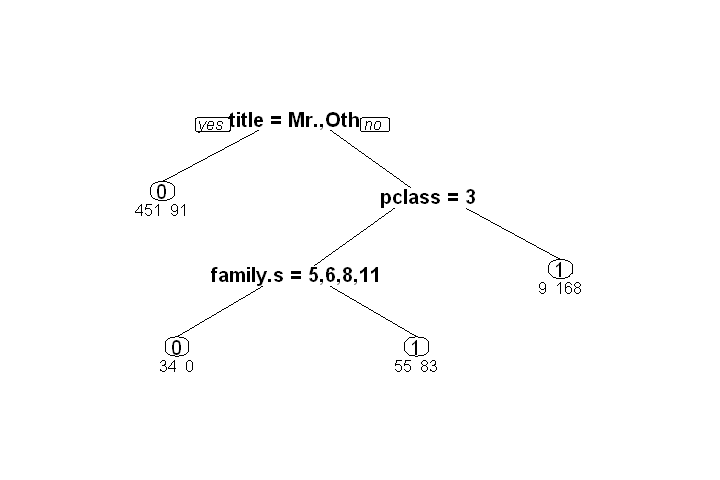

In [57]:
# Grab features
features <- c("pclass", "title", "family.size")
rpart.train.1 <- data.combined[1:891, features]

# Run CV and check out results
rpart.1.cv.1 <- rpart.cv(94622, rpart.train.1, rf.label, ctrl.3)
rpart.1.cv.1

# Plot
prp(rpart.1.cv.1$finalModel, type = 0, extra = 1, under = TRUE)


If your title is "Mr. or Other" then you will likely perish. The numbers beneath will show you the proportions. The algorithm doesn't know how to slice this anymore, and therefore, it shows you will perish.

If you are not a "Mr. or Other", and if your pclass is not 3, then likely you will likely survive. 

If your family size is 5,6,8,11, you will die. If not, you will survive.

The plot bring out some interesting lines of investigation. Namely: <br/>
1 - Titles of "Mr." and "Other" are predicted to perish at an overall accuracy rate of 83.2 %. <br/>
2 - Titles of "Master.", "Miss.", & "Mrs." in 1st & 2nd class are predicted to survive at an overall accuracy rate of 94.9%. There is probably not much more to do here. <br/>
3 - Titles of "Master.", "Miss.", & "Mrs." in 3rd class with family sizes equal to 5, 6, 8, & 11 are predicted to perish with 100% accuracy. **This might be a case of overfitting**. IE there might only be ONE family in the test set with 5 people in the family, which happen to be in 3rd class. <br/>
Perhaps we can generalize this more with something like "if this is greater than 5, less than 5"

4 - Titles of "Master.", "Miss.", & "Mrs." in 3rd class with family sizes not equal to 5, 6, 8, or 11 are predicted to survive with 59.6% accuracy.


### MAssaging Titles

The titles are too many, therefore we will explore titles and then collapse them into a smaller amount of titles

In [59]:
# Parse out last name and title
data.combined[1:25, "name"]

name.splits <- str_split(data.combined$name, ",")
name.splits[1]
last.names <- sapply(name.splits, "[", 1) #"[" is the indexing operator ]
last.names[1:10]

[1] Braund, Mr. Owen Harris                                
 [2] Cumings, Mrs. John Bradley (Florence Briggs Thayer)    
 [3] Heikkinen, Miss. Laina                                 
 [4] Futrelle, Mrs. Jacques Heath (Lily May Peel)           
 [5] Allen, Mr. William Henry                               
 [6] Moran, Mr. James                                       
 [7] McCarthy, Mr. Timothy J                                
 [8] Palsson, Master. Gosta Leonard                         
 [9] Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)      
[10] Nasser, Mrs. Nicholas (Adele Achem)                    
[11] Sandstrom, Miss. Marguerite Rut                        
[12] Bonnell, Miss. Elizabeth                               
[13] Saundercock, Mr. William Henry                         
[14] Andersson, Mr. Anders Johan                            
[15] Vestrom, Miss. Hulda Amanda Adolfina                   
[16] Hewlett, Mrs. (Mary D Kingcome)                        
[17] Rice, Master. Eugene                                   
[18] Williams, Mr. Charles Eugene                           
[19] Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)
[20] Masselmani, Mrs. Fatima                                
[21] Fynney, Mr. Joseph J                                   
[22] Beesley, Mr. Lawrence                                  
[23] McGowan, Miss. Anna "Annie"                            
[24] Sloper, Mr. William Thompson                           
[25] Palsson, Miss. Torborg Danira                          
1307 Levels: Abbing, Mr. Anthony ... Zakarian, Mr. Ortin

[[1]]
[1] "Braund"           " Mr. Owen Harris"

[1] "Braund"    "Cumings"   "Heikkinen" "Futrelle"  "Allen"     "Moran"    
 [7] "McCarthy"  "Palsson"   "Johnson"   "Nasser"

In [63]:
# Add last names to dataframe in case we find it useful later
data.combined$last.name <- last.names

# Now for titles
name.splits <- str_split(sapply(name.splits, "[", 2), " ")
titles <- sapply(name.splits, "[", 2)
unique(titles)

# What's up with a title of 'the'?
data.combined[which(titles == "the"),]

[1] "Mr."       "Mrs."      "Miss."     "Master."   "Don."      "Rev."     
 [7] "Dr."       "Mme."      "Ms."       "Major."    "Lady."     "Sir."     
[13] "Mlle."     "Col."      "Capt."     "the"       "Jonkheer." "Dona."

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,family.size,ticket.first.char,cabin.first.char,cabin.multiple,last.name
760,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)",female,33,0,0,110152,86.5,B77,S,Other,1,1,B,N,Rothes


In [64]:
# Re-map titles to be more exact
titles[titles %in% c("Dona.", "the")] <- "Lady."
titles[titles %in% c("Ms.", "Mlle.")] <- "Miss."
titles[titles == "Mme."] <- "Mrs."
titles[titles %in% c("Jonkheer.", "Don.")] <- "Sir."
titles[titles %in% c("Col.", "Capt.", "Major.")] <- "Officer"
table(titles)


titles
    Dr.   Lady. Master.   Miss.     Mr.    Mrs. Officer    Rev.    Sir. 
      8       3      61     264     757     198       7       8       3 

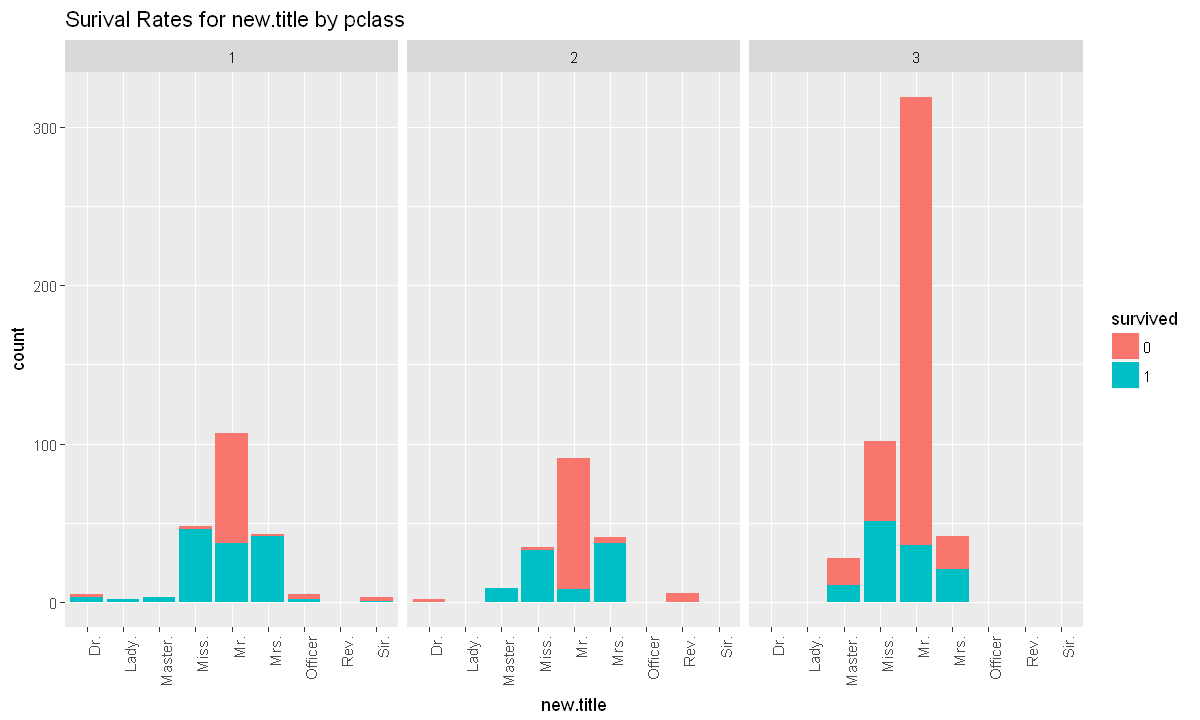

In [68]:
# Make title a factor
data.combined$new.title <- as.factor(titles)
# Visualize it to see if it is predictive
options(repr.plot.width=10, repr.plot.height=6)

# Visualize new version of title
ggplot(data.combined[1:891,], aes(x = new.title, fill = survived)) + theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  geom_bar() + facet_wrap(~ pclass) + ggtitle("Surival Rates for new.title by pclass")


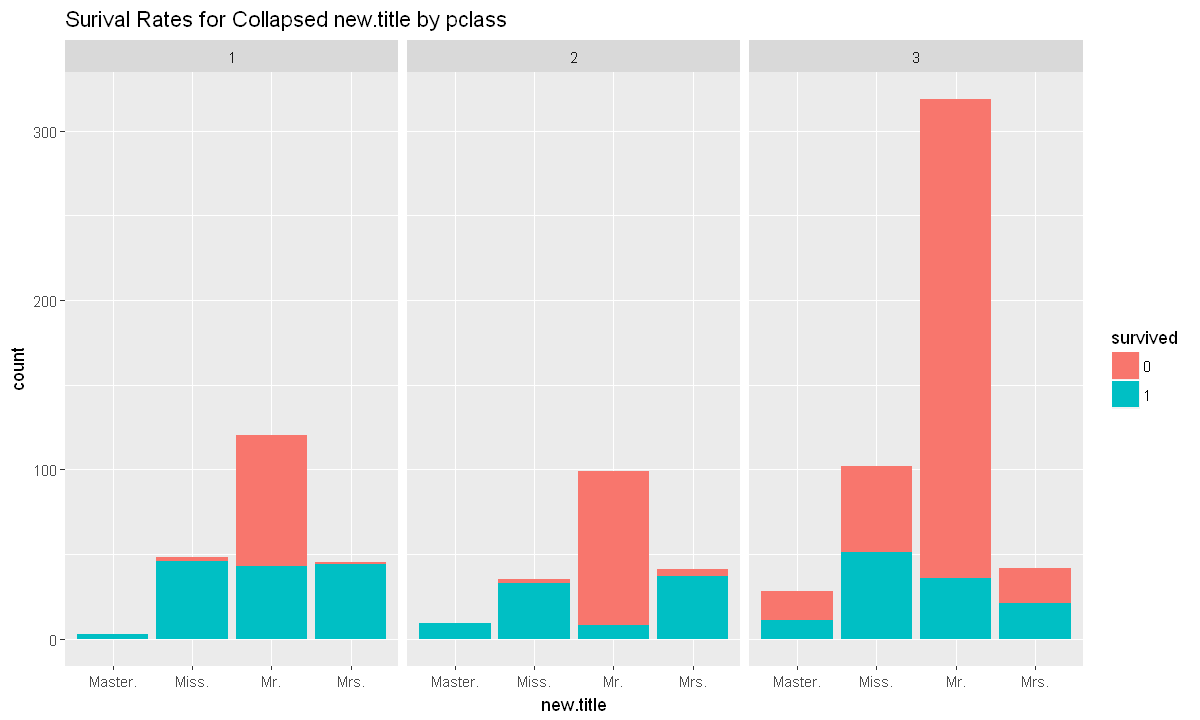

In [69]:
# Collapse titles based on visual analysis
indexes <- which(data.combined$new.title == "Lady.")
data.combined$new.title[indexes] <- "Mrs."

indexes <- which(data.combined$new.title == "Dr." | 
                 data.combined$new.title == "Rev." |
                 data.combined$new.title == "Sir." |
                 data.combined$new.title == "Officer")
data.combined$new.title[indexes] <- "Mr."

# Visualize 
ggplot(data.combined[1:891,], aes(x = new.title, fill = survived)) +
  geom_bar() +
  facet_wrap(~ pclass) +
  ggtitle("Surival Rates for Collapsed new.title by pclass")

CART 

891 samples
  3 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 10 times) 
Summary of sample sizes: 594, 594, 594, 594, 594, 594, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.00000000  0.8178451  0.6047735
  0.01582980  0.8261504  0.6252869
  0.03165961  0.8280584  0.6303902
  0.04748941  0.8145903  0.6049449
  0.06331922  0.7936027  0.5633852
  0.07914902  0.7947250  0.5672045
  0.09497883  0.7939394  0.5658414
  0.11080863  0.7929293  0.5641059
  0.12663844  0.7924804  0.5634784
  0.14246824  0.7923681  0.5635873
  0.15829804  0.7923681  0.5635873
  0.17412785  0.7923681  0.5635873
  0.18995765  0.7923681  0.5635873
  0.20578746  0.7923681  0.5635873
  0.22161726  0.7923681  0.5635873
  0.23744707  0.7923681  0.5635873
  0.25327687  0.7923681  0.5635873
  0.26910667  0.7923681  0.5635873
  0.28493648  0.7923681  0.5635873
  0.30076628  0.7923681  0.5635873
  0.31659609  0.7923681  0.

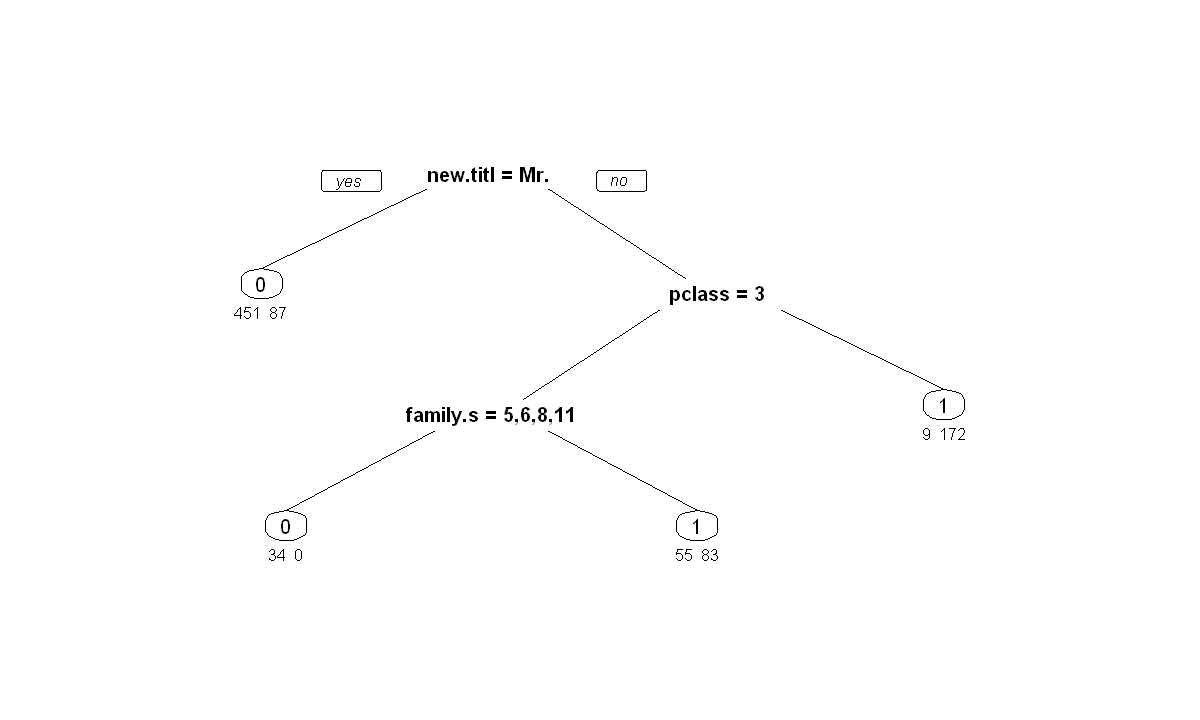

In [71]:
# Grab features
features <- c("pclass", "new.title", "family.size")
rpart.train.2 <- data.combined[1:891, features]

# Run CV and check out results
rpart.2.cv.1 <- rpart.cv(94622, rpart.train.2, rf.label, ctrl.3)
rpart.2.cv.1

# Plot
prp(rpart.2.cv.1$finalModel, type = 0, extra = 1, under = TRUE)


In [73]:
# Dive in on 1st class "Mr."
indexes.first.mr <- which(data.combined$new.title == "Mr." & data.combined$pclass == "1")
first.mr.df <- data.combined[indexes.first.mr, ]
summary(first.mr.df)


  passengerid     survived  pclass                                    name    
 Min.   :   7.0   0   :77   1:175   Anderson, Mr. Harry                 :  1  
 1st Qu.: 372.5   1   :43   2:  0   Andrews, Mr. Thomas Jr              :  1  
 Median : 648.0   None:55   3:  0   Artagaveytia, Mr. Ramon             :  1  
 Mean   : 657.7                     Barkworth, Mr. Algernon Henry Wilson:  1  
 3rd Qu.: 966.0                     Baumann, Mr. John D                 :  1  
 Max.   :1299.0                     Baxter, Mr. Quigg Edmond            :  1  
                                    (Other)                             :169  
     sex           age            sibsp            parch        ticket         
 female:  1   Min.   :17.00   Min.   :0.0000   0      :146   Length:175        
 male  :174   1st Qu.:31.00   1st Qu.:0.0000   1      : 21   Class :character  
              Median :42.00   Median :0.0000   2      :  6   Mode  :character  
              Mean   :42.24   Mean   :0.3257   3

In [74]:
# One female?
first.mr.df[first.mr.df$sex == "female",]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,family.size,ticket.first.char,cabin.first.char,cabin.multiple,last.name,new.title
797,797,1,1,"Leader, Dr. Alice (Farnham)",female,49,0,0,17465,25.9292,D17,S,Other,1,1,D,N,Leader,Mr.


In [76]:
# Update new.title feature
indexes <- which(data.combined$new.title == "Mr." & 
                 data.combined$sex == "female")
data.combined$new.title[indexes] <- "Mrs."

In [78]:
# Any other gender slip-ups?
length(which(data.combined$sex == "female" & 
             (data.combined$new.title == "Master." |
              data.combined$new.title == "Mr.")))

[1] 0

In [79]:
# Refresh data frame
indexes.first.mr <- which(data.combined$new.title == "Mr." & data.combined$pclass == "1")
first.mr.df <- data.combined[indexes.first.mr, ]

In [81]:
# Let's look at surviving 1st class "Mr."
summary(first.mr.df[first.mr.df$survived == "1",])

  passengerid    survived  pclass
 Min.   : 24.0   0   : 0   1:42  
 1st Qu.:435.2   1   :42   2: 0  
 Median :594.0   None: 0   3: 0  
 Mean   :528.5                   
 3rd Qu.:681.5                   
 Max.   :890.0                   
                                 
                                        name        sex          age       
 Anderson, Mr. Harry                      : 1   female: 0   Min.   :17.00  
 Barkworth, Mr. Algernon Henry Wilson     : 1   male  :42   1st Qu.:28.00  
 Beckwith, Mr. Richard Leonard            : 1               Median :36.00  
 Behr, Mr. Karl Howell                    : 1               Mean   :38.76  
 Bishop, Mr. Dickinson H                  : 1               3rd Qu.:48.00  
 Bjornstrom-Steffansson, Mr. Mauritz Hakan: 1               Max.   :80.00  
 (Other)                                  :36               NA's   :5      
     sibsp            parch       ticket               fare       
 Min.   :0.0000   0      :36   Length:42          Min

### Taking a look at prices

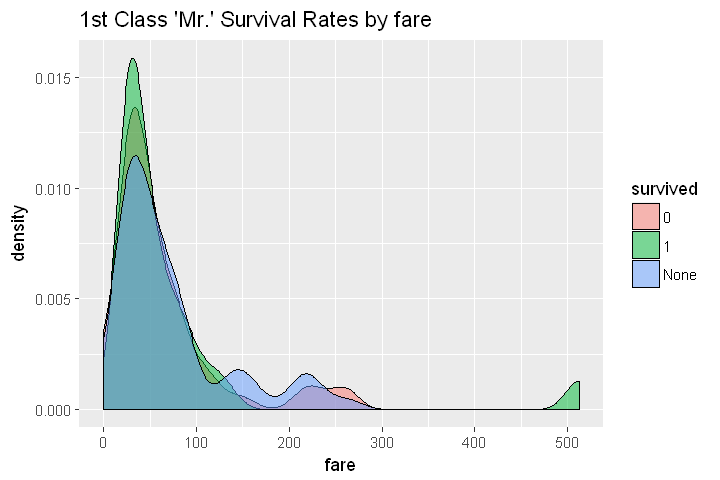

In [105]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(first.mr.df, aes(x = fare, fill = survived)) + geom_density(alpha = 0.5) + 
ggtitle("1st Class 'Mr.' Survival Rates by fare")

In [121]:
first.mr.df<-first.mr.df[order(-first.mr.df$fare),] ##sort by fare
head(first.mr.df[first.mr.df$survived == "1",],n=10) #view male survivors

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,family.size,ticket.first.char,cabin.first.char,cabin.multiple,last.name,new.title
680,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr.,2,P,B,Y,Cardeza,Mr.
738,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C,Mr.,1,P,B,N,Lesurer,Mr.
661,661,1,1,"Frauenthal, Dr. Henry William",male,50,2,0,PC 17611,133.6500,U,S,Other,3,P,U,N,Frauenthal,Mr.
391,391,1,1,"Carter, Mr. William Ernest",male,36,1,2,113760,120.0000,B96 B98,S,Mr.,4,1,B,Y,Carter,Mr.
551,551,1,1,"Thayer, Mr. John Borland Jr",male,17,0,2,17421,110.8833,C70,C,Mr.,3,1,C,N,Thayer,Mr.
485,485,1,1,"Bishop, Mr. Dickinson H",male,25,1,0,11967,91.0792,B49,C,Mr.,2,1,B,N,Bishop,Mr.
225,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38,1,0,19943,90.0000,C93,S,Mr.,2,1,C,N,Hoyt,Mr.
454,454,1,1,"Goldenberg, Mr. Samuel L",male,49,1,0,17453,89.1042,C92,C,Mr.,2,1,C,N,Goldenberg,Mr.
588,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60,1,1,13567,79.2000,B41,C,Mr.,3,1,B,N,Frolicher-Stehli,Mr.
646,646,1,1,"Harper, Mr. Henry Sleeper",male,48,1,0,PC 17572,76.7292,D33,C,Mr.,2,P,D,N,Harper,Mr.


In [122]:
# Take a look at some of the high fares
indexes <- which(data.combined$ticket == "PC 17755" |
                 data.combined$ticket == "PC 17611" |
                 data.combined$ticket == "113760")
data.combined[indexes,]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,family.size,ticket.first.char,cabin.first.char,cabin.multiple,last.name,new.title
259,259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.3292,U,C,Miss.,1,P,U,N,Ward,Miss.
335,335,1,1,"Frauenthal, Mrs. Henry William (Clara Heinsheimer)",female,NA,1,0,PC 17611,133.6500,U,S,Mrs.,2,P,U,N,Frauenthal,Mrs.
391,391,1,1,"Carter, Mr. William Ernest",male,36,1,2,113760,120.0000,B96 B98,S,Mr.,4,1,B,Y,Carter,Mr.
436,436,1,1,"Carter, Miss. Lucile Polk",female,14,1,2,113760,120.0000,B96 B98,S,Miss.,4,1,B,Y,Carter,Miss.
661,661,1,1,"Frauenthal, Dr. Henry William",male,50,2,0,PC 17611,133.6500,U,S,Other,3,P,U,N,Frauenthal,Mr.
680,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr.,2,P,B,Y,Cardeza,Mr.
738,738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.3292,B101,C,Mr.,1,P,B,N,Lesurer,Mr.
764,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36,1,2,113760,120.0000,B96 B98,S,Mrs.,4,1,B,Y,Carter,Mrs.
803,803,1,1,"Carter, Master. William Thornton II",male,11,1,2,113760,120.0000,B96 B98,S,Master.,4,1,B,Y,Carter,Master.
1235,1235,None,1,"Cardeza, Mrs. James Warburton Martinez (Charlotte Wardle Drake)",female,58,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs.,2,P,B,Y,Cardeza,Mrs.


In [125]:
# Engineer features based on all the passengers with the same ticket
ticket.party.size <- rep(0, nrow(data.combined))
avg.fare <- rep(0.0, nrow(data.combined))
tickets <- unique(data.combined$ticket)


In [130]:
length(tickets)

[1] 929

In [131]:
for (i in 1:length(tickets)) {
  current.ticket <- tickets[i]
  party.indexes <- which(data.combined$ticket == current.ticket)
  current.avg.fare <- data.combined[party.indexes[1], "fare"] / length(party.indexes)
  
  for (k in 1:length(party.indexes)) {
    ticket.party.size[party.indexes[k]] <- length(party.indexes)
    avg.fare[party.indexes[k]] <- current.avg.fare
  }
}

data.combined$ticket.party.size <- ticket.party.size
data.combined$avg.fare <- avg.fare

# Refresh 1st class "Mr." dataframe
first.mr.df <- data.combined[indexes.first.mr, ]
summary(first.mr.df)

  passengerid     survived  pclass                                    name    
 Min.   :   7.0   0   :77   1:174   Anderson, Mr. Harry                 :  1  
 1st Qu.: 371.8   1   :42   2:  0   Andrews, Mr. Thomas Jr              :  1  
 Median : 647.0   None:55   3:  0   Artagaveytia, Mr. Ramon             :  1  
 Mean   : 656.9                     Barkworth, Mr. Algernon Henry Wilson:  1  
 3rd Qu.: 966.5                     Baumann, Mr. John D                 :  1  
 Max.   :1299.0                     Baxter, Mr. Quigg Edmond            :  1  
                                    (Other)                             :168  
     sex           age            sibsp            parch        ticket         
 female:  0   Min.   :17.00   Min.   :0.0000   0      :145   Length:174        
 male  :174   1st Qu.:31.00   1st Qu.:0.0000   1      : 21   Class :character  
              Median :42.00   Median :0.0000   2      :  6   Mode  :character  
              Mean   :42.20   Mean   :0.3276   3

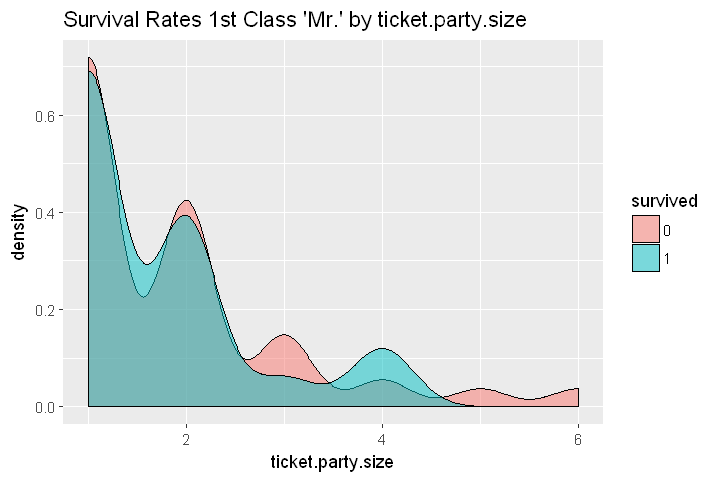

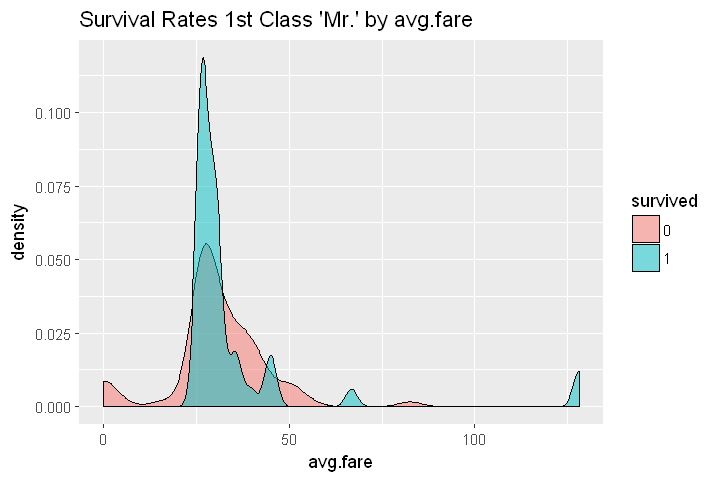

In [132]:
# Visualize new features
ggplot(first.mr.df[first.mr.df$survived != "None",], aes(x = ticket.party.size, fill = survived)) +
  geom_density(alpha = 0.5) +
  ggtitle("Survival Rates 1st Class 'Mr.' by ticket.party.size")

ggplot(first.mr.df[first.mr.df$survived != "None",], aes(x = avg.fare, fill = survived)) +
  geom_density(alpha = 0.5) +
  ggtitle("Survival Rates 1st Class 'Mr.' by avg.fare")

In [133]:
# Hypothesis - ticket.party.size is highly correlated with avg.fare 
# we want to do this to see if one of the fields is redundant
summary(data.combined$avg.fare)

# One missing value, take a look
data.combined[is.na(data.combined$avg.fare), ]

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    7.55    8.05   14.76   15.01  128.10       1 

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,...,embarked,title,family.size,ticket.first.char,cabin.first.char,cabin.multiple,last.name,new.title,ticket.party.size,avg.fare
1044,1044,None,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NA,...,S,Mr.,1,3,U,N,Storey,Mr.,1,NA


In [134]:
# Get records for similar passengers and summarize avg.fares
indexes <- with(data.combined, which(pclass == "3" & title == "Mr." & family.size == 1 & ticket != "3701"))
similar.na.passengers <- data.combined[indexes,]
summary(similar.na.passengers$avg.fare)

# Use median since close to mean and a little higher than mean
data.combined[is.na(avg.fare), "avg.fare"] <- 7.840

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   7.250   7.840   7.717   8.050  10.170 

In [136]:
# Leverage caret's preProcess function to normalize data
preproc.data.combined <- data.combined[, c("ticket.party.size", "avg.fare")]
preProc <- preProcess(preproc.data.combined, method = c("center", "scale"))

postproc.data.combined <- predict(preProc, preproc.data.combined)

In [138]:
# Hypothesis refuted for all data
cor(postproc.data.combined$ticket.party.size, postproc.data.combined$avg.fare)

[1] 0.09428625

In [140]:
# How about for just 1st class all-up?
indexes <- which(data.combined$pclass == "1")
cor(postproc.data.combined$ticket.party.size[indexes], 
    postproc.data.combined$avg.fare[indexes])
# Hypothesis refuted again

[1] 0.2576249

CART 

891 samples
  5 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (3 fold, repeated 10 times) 
Summary of sample sizes: 594, 594, 594, 594, 594, 594, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.00000000  0.8214366  0.6170703
  0.01593063  0.8315376  0.6352241
  0.03186126  0.8305275  0.6336075
  0.04779189  0.8157127  0.6070448
  0.06372252  0.7965208  0.5710962
  0.07965316  0.7958474  0.5698216
  0.09558379  0.7950617  0.5684585
  0.11151442  0.7940516  0.5667230
  0.12744505  0.7936027  0.5660955
  0.14337568  0.7934905  0.5662044
  0.15930631  0.7934905  0.5662044
  0.17523694  0.7934905  0.5662044
  0.19116757  0.7934905  0.5662044
  0.20709821  0.7934905  0.5662044
  0.22302884  0.7934905  0.5662044
  0.23895947  0.7934905  0.5662044
  0.25489010  0.7934905  0.5662044
  0.27082073  0.7934905  0.5662044
  0.28675136  0.7934905  0.5662044
  0.30268199  0.7934905  0.5662044
  0.31861262  0.7934905  0.

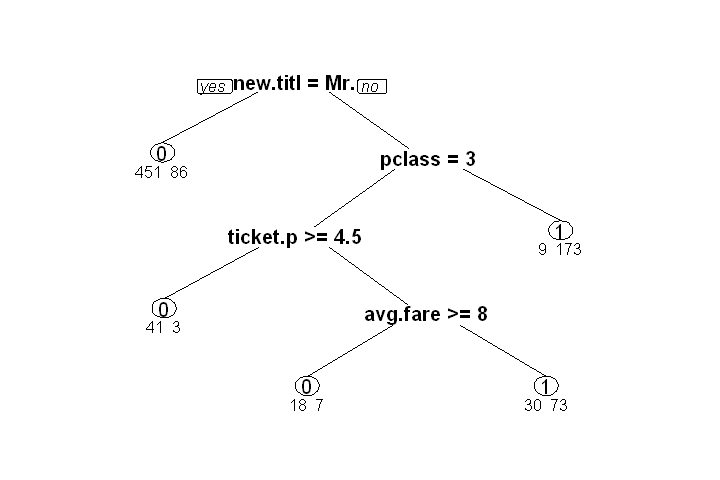

In [141]:
# OK, let's see if our feature engineering has made any difference
features <- c("pclass", "new.title", "family.size", "ticket.party.size", "avg.fare")
rpart.train.3 <- data.combined[1:891, features]

# Run CV and check out results
rpart.3.cv.1 <- rpart.cv(94622, rpart.train.3, rf.label, ctrl.3)
rpart.3.cv.1

# Plot
prp(rpart.3.cv.1$finalModel, type = 0, extra = 1, under = TRUE)


## Final Submission and Tuning

Final prediction and submission to kaggle

### Single Tree Model

In [178]:
# Rpart scores 0.80383
# Subset our test records and features and grab features

features <- c("pclass", "new.title", "family.size", "ticket.party.size", "avg.fare")
test.submit.df <- data.combined[892:1309, features]

# Make predictions
rpart.3.preds <- predict(rpart.3.cv.1$finalModel, test.submit.df, type = "class")
table(rpart.3.preds)

rpart.3.preds
  0   1 
266 152 

### Random Forrest

In [184]:
#
# Random forest scores 0.80861
#
features <- c("pclass", "new.title", "ticket.party.size", "avg.fare")
rf.train.temp <- data.combined[1:891, features]

set.seed(1234)
rf.temp <- randomForest(x = rf.train.temp, y = rf.label, ntree = 1000)
rf.temp

test.submit.df <- data.combined[892:1309, features]

# Make predictions
rf.preds <- predict(rf.temp, test.submit.df)
table(rf.preds)


Call:
 randomForest(x = rf.train.temp, y = rf.label, ntree = 1000) 
               Type of random forest: classification
                     Number of trees: 1000
No. of variables tried at each split: 2

        OOB estimate of  error rate: 16.16%
Confusion matrix:
    0   1 class.error
0 502  47   0.0856102
1  97 245   0.2836257

rf.preds
  0   1 
265 153 

Random forrest predicts 153 survives while the single tree predicts 152.

In [181]:
# Write out a CSV file for submission to Kaggle
submit.df <- data.frame(PassengerId = rep(892:1309), Survived = rf.preds)
head(submit.df, n=10)
#write.csv(submit.df, file = "RF_SUB_20160619_1.csv", row.names = FALSE)

rf.preds
  0   1 
265 153 

,PassengerId,Survived
892,892,0
893,893,1
894,894,0
895,895,0
896,896,1
897,897,0
898,898,1
899,899,0
900,900,1
901,901,0


### If we want to improve our model, a good place to start is focusing on where it gets things wrong!

Take a look at adult makes. We get it wrong quite a bit. (451, 86) means we just have a difficult time splitting males.

Mutual information is a concept of mathematical seeing how useful features are. If I am trying to predict A using B, how much more am I going to know about variable A if I know variable B.

In [186]:
?mutinformation

In [182]:
#install.packages("infotheo")
library(infotheo)

mutinformation(rf.label, data.combined$pclass[1:891])
mutinformation(rf.label, data.combined$sex[1:891])
mutinformation(rf.label, data.combined$sibsp[1:891])
mutinformation(rf.label, data.combined$parch[1:891])
mutinformation(rf.label, discretize(data.combined$fare[1:891]))
mutinformation(rf.label, data.combined$embarked[1:891])
mutinformation(rf.label, data.combined$title[1:891])
mutinformation(rf.label, data.combined$family.size[1:891])
mutinformation(rf.label, data.combined$ticket.first.char[1:891])
mutinformation(rf.label, data.combined$cabin.multiple[1:891])
mutinformation(rf.label, data.combined$new.title[1:891])
mutinformation(rf.label, data.combined$ticket.party.size[1:891])
mutinformation(rf.label, discretize(data.combined$avg.fare[1:891]))

Warning message:
"package 'infotheo' was built under R version 3.3.2"

[1] 0.05810725

[1] 0.1508705

[1] 0.02319709

[1] 0.01636558

[1] 0.06616096

[1] 0.01666817

[1] 0.1661094

[1] 0.04778124

[1] 0.0686185

[1] 0.002248365

[1] 0.1710514

[1] 0.05860494

[1] 0.05206484

### Let's Look At Our Best
OK, now let's leverage the tsne algorithm to create a 2-D representation of our data suitable for visualization starting with folks our model gets right very often - folks with titles other than 'Mr."

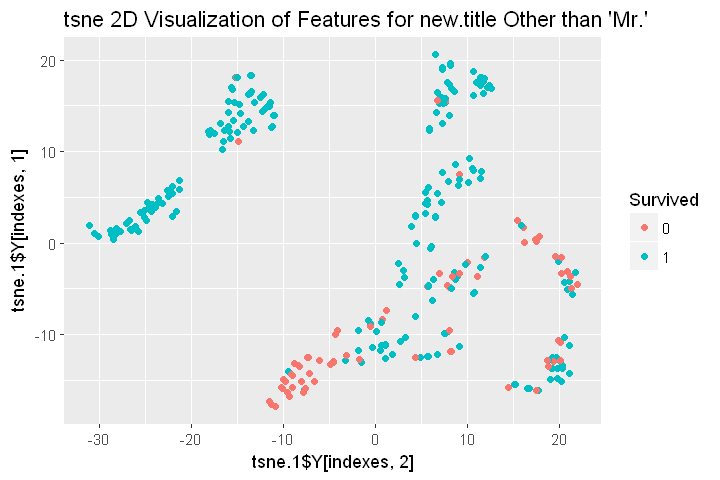

In [195]:
#install.packages("Rtsne")
library(Rtsne)
most.correct <- data.combined[data.combined$new.title != "Mr.",]
indexes <- which(most.correct$survived != "None")

# NOTE - Bug fix for original version. Rtsne needs a seed to ensure consistent output between runs.
set.seed(984357)
features <- c("pclass", "new.title", "ticket.party.size", "avg.fare")
tsne.1 <- Rtsne(most.correct[, features], check_duplicates = FALSE)

options(repr.plot.width=6, repr.plot.height=4)

ggplot(NULL, aes(x = tsne.1$Y[indexes, 2], y = tsne.1$Y[indexes, 1], color = most.correct$survived[indexes])) +
  geom_point() + labs(color = "Survived") + ggtitle("tsne 2D Visualization of Features for new.title Other than 'Mr.'")

In [196]:
# To get a baseline, let's use conditional mutual information on the tsne X and
# Y features for females and boys in 1st and 2nd class. The intuition here is that
# the combination of these features should be higher than any individual feature
# we looked at above.
condinformation(most.correct$survived[indexes], discretize(tsne.1$Y[indexes,]))

[1] 0.2579789

In [197]:
# As one more comparison, we can leverage conditional mutual information using
# the top two features used in our tree plot - new.title and pclass
condinformation(rf.label, data.combined[1:891, c("new.title", "pclass")])

[1] 0.2506932

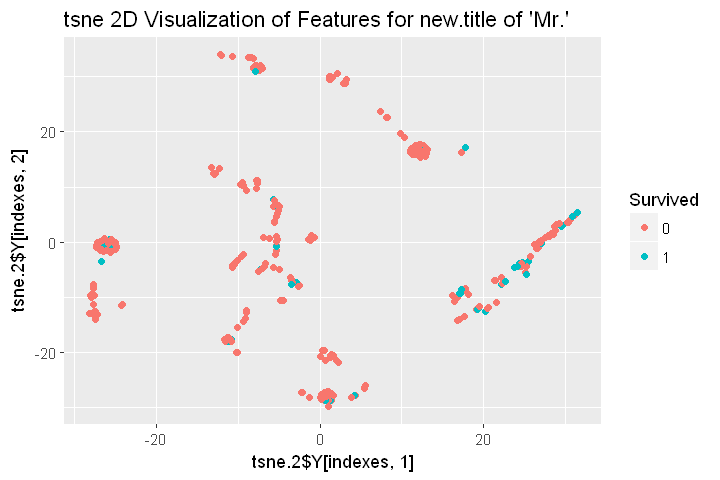

In [198]:
# OK, now let's take a look at adult males since our model has the biggest 
# potential upside for improving (i.e., the tree predicts incorrectly for 86
# adult males). Let's visualize with tsne.
misters <- data.combined[data.combined$new.title == "Mr.",]
indexes <- which(misters$survived != "None")

tsne.2 <- Rtsne(misters[, features], check_duplicates = FALSE)
ggplot(NULL, aes(x = tsne.2$Y[indexes, 1], y = tsne.2$Y[indexes, 2],color = misters$survived[indexes])) +
  geom_point() +labs(color = "Survived") + ggtitle("tsne 2D Visualization of Features for new.title of 'Mr.'")

In [199]:
# Now conditional mutual information for tsne features for adult males
condinformation(misters$survived[indexes], discretize(tsne.2$Y[indexes,]))

[1] 0.07556394

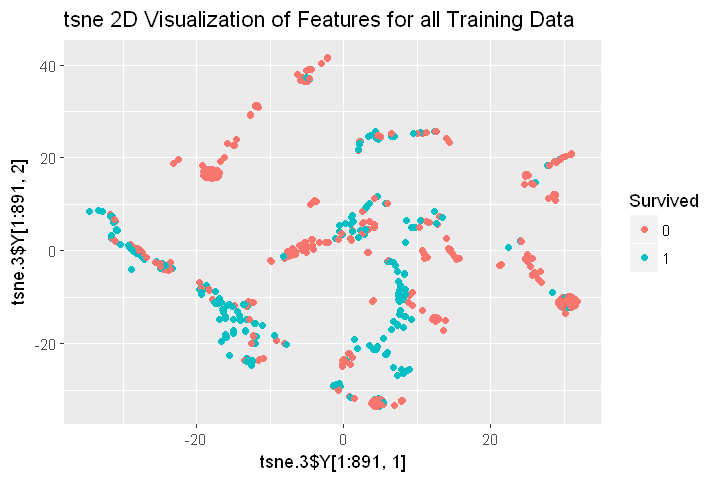

In [200]:
#
# Idea - How about creating tsne featues for all of the training data and
# using them in our model?
#
tsne.3 <- Rtsne(data.combined[, features], check_duplicates = FALSE)
ggplot(NULL, aes(x = tsne.3$Y[1:891, 1], y = tsne.3$Y[1:891, 2], 
                 color = data.combined$survived[1:891])) +
  geom_point() +
  labs(color = "Survived") +
  ggtitle("tsne 2D Visualization of Features for all Training Data")

In [201]:
# Now conditional mutual information for tsne features for all training
condinformation(data.combined$survived[1:891], discretize(tsne.3$Y[1:891,]))

[1] 0.2135174

In [202]:
# Add the tsne features to our data frame for use in model building
data.combined$tsne.x <- tsne.3$Y[,1]
data.combined$tsne.y <- tsne.3$Y[,2]

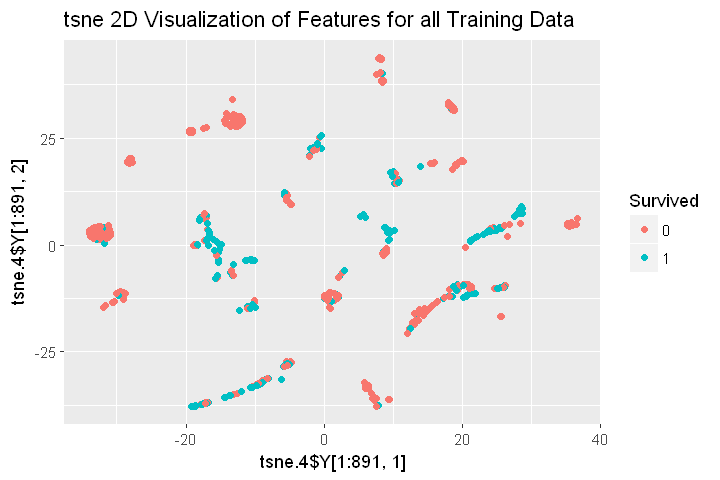

In [207]:
features <- c('tsne.x','tsne.y')

tsne.4 <- Rtsne(data.combined[, features], check_duplicates = FALSE)
ggplot(NULL, aes(x = tsne.4$Y[1:891, 1], y = tsne.4$Y[1:891, 2], 
                 color = data.combined$survived[1:891])) +
  geom_point() +
  labs(color = "Survived") +
  ggtitle("tsne 2D Visualization of Features for all Training Data")